# Lending Club Case Study Analysis


## The analysis is divided into four main parts:

    1. Data Loading
    2. Data Understanding
    3. Data Cleaning & Manipulation (Cleaning missing values, Remove Unnecessary Columns, Data Conversion etc.)
    4. Data Analysis
    5. Recommendations
  


## Objective

The company wants to understand the driving factors (or driver variables) behind loan default (loan_status = 'Charged Off'), i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


# Data Loading 

### 1. Importing Libraries

In [70]:

# Import the numpy and pandas packages
import numpy as np
import pandas as pd

# Import matplotlin & seaborn for data visualization charts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Show all rows and columns
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

### 2. Load Data set

In [71]:
loan_data = pd.read_csv("loan.csv")


# Data Understanding

In [72]:
# let's look at the first few rows of the df
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [73]:
# Looking at all the columns
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [74]:
# Looking at all the columns info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [75]:
# Inspecting the count of rows & columns
loan_data.shape

(39717, 111)

In [76]:
# Checking null values
100 * loan_data.isnull().mean()

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [77]:
# Checking unique values
loan_data.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26526
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


As per above outputs it is understood that there are many columns which are null in nature and also few columns with single value which we need to drop off as they will be no use for our analysis

# Data Cleaning & Manipulation

1. To check if there are any headers/footers or summary details rows are there and delete it.
2. Analyze and Resolve Data Type Issues, columns that has mixed data types.
3. Handling Data quality issues (missing value imputation, outlier treatment and other kinds of data redundancies, etc.).   
4. Remove Unnecessary Columns: Columns that do not contribute to the analysis or have excessive missing values might need to be dropped.
5. Convert Data Types: Convert columns like int_rate from string to numeric and standardize date formats if necessary.

### 1. Check for any headers/footers or summary details 


In [78]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

We can see that there are no headers or summary row presents from above dataframe. Lets check for footers rows.

In [79]:
loan_data.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE    110000.0        Not Verified  Jul-07   
39713    3 years           RENT     18000.0        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE    100000.0        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE    200000.0        Not Verified  Jul-07   
39716   < 1 year            OWN     22000.0        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state    dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO  11.33            0   
39713  Retiring credit card debt    274xx         NC   6.40            1   
39714     MBA Loan Consolidation    017xx         MA   2.30            0   
39715                   JAL Loan    208xx         MD   3.72            0   
39716         Consolidation Loan    027xx         MA  14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                     0.0   
39713           Dec-86               1                     5.0   
39714           Oct-98               0                     0.0   
39715           Nov-88               0                     0.0   
39716           Oct-03               0                    11.0   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                     0.0        13        0       7274     13.10%   
39713                     0.0         6        0       8847     26.90%   
39714                     0.0        11        0       9698     19.40%   
39715                     0.0        17        0      85607      0.70%   
39716                     0.0         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f        0.0            0.0  2822.969293   
39713          9                   f        0.0            0.0  9913.491822   
39714         20                   f        0.0         

From above analysis we can say that there are no Footers, Total, Subtotal rows as well.

### 2. Remove Unnecessary Columns & missing values

In [80]:
# summarising number of missing values in each column
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [81]:
# percentage of missing values in each column
missing_data = loan_data.isnull().mean() * 100
missing_data.sort_values(ascending=False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [82]:
# dropping the columns having more than 40% missing values

columns_to_drop = missing_data[missing_data > 40].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

In [83]:
# summarise missing values again
loan_data_cleaned.isnull().mean() * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [84]:
# We see desc column which has 32% null values and also it has no relevance to EDA in finding the driver variables behind loan default     
loan_data_cleaned = loan_data_cleaned.drop(["desc"],axis=1)

In [85]:
loan_data_cleaned.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [86]:
# From above output it is seen most of the columns values is 1. Dropping them as well.
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned.columns[loan_data_cleaned.nunique() != 1]] 

In [87]:
loan_data_cleaned.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [88]:
# Lets get rid of columns "zip_code","member_id","url" as it has no relevance to EDA in finding the driver variables behind loan default 
# zip_code could have been a useful driver, but it contains only partial data which might impute our analysis negatively
loan_data_cleaned = loan_data_cleaned.drop(["zip_code","member_id","url"],axis=1)

In [89]:
# We can remove sub_grade column and focus on grade
loan_data_cleaned = loan_data_cleaned.drop(["sub_grade"],axis=1)

In [90]:
# The column purpose can be used instead of "title" as it contains too much random information as compared to purpose.
loan_data_cleaned = loan_data_cleaned.drop(["title"],axis=1)

#### To Identify the ‘risky’ applicants we need to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default for new loan applications for which we need to focus on variables available before loan approval.       
Hence need to remove the variables which are generated post-approval of loan or are not directly indicative of the borrower's pre-approval financial status and creditworthiness and thus they cannot be used as predictors for credit approval

In [91]:
# Dropping columns which are generated post-approval of loan
loan_data_cleaned = loan_data_cleaned.drop(["funded_amnt",
                                            "funded_amnt_inv",
                                            "out_prncp",
                                            "out_prncp_inv",
                                            "total_pymnt",
                                            "total_pymnt_inv",
                                            "total_rec_prncp",
                                            "total_rec_int",
                                            "total_rec_late_fee",
                                            "recoveries",
                                            "collection_recovery_fee",
                                            "last_pymnt_d",
                                            "last_pymnt_amnt",
                                            "last_credit_pull_d",
                                            "emp_title"],axis=1)


In [92]:
100 *loan_data_cleaned.isnull().mean()

id                      0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [93]:
# Dropping the null rows for revol_util, pub_rec_bankruptcies columns as number of null rows are very less.

loan_data_cleaned = loan_data_cleaned[loan_data_cleaned['revol_util'].notna()]
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned['pub_rec_bankruptcies'].notna()]


In [94]:
100 *loan_data_cleaned.isnull().mean()

id                      0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.750834
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
pub_rec_bankruptcies    0.000000
dtype: float64

### 4. Handling Data quality issues (Imputing/Standardize)

In [95]:
# Now we are only left with column "emp_length" with null values. lets see what kind of data it has.
loan_data_cleaned.emp_length.value_counts()

emp_length
10+ years    8759
< 1 year     4404
2 years      4299
3 years      4030
4 years      3384
5 years      3245
1 year       3142
6 years      2194
7 years      1748
8 years      1452
9 years      1241
Name: count, dtype: int64

In [96]:
loan_data_cleaned.emp_length.mode()[0]

'10+ years'

### Imputation
#### The above value counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.


In [97]:
loan_data_cleaned.emp_length.fillna(loan_data_cleaned.emp_length.mode()[0], inplace = True)
loan_data_cleaned.emp_length.isna().sum()

0

### Standardize

Lets standardize emp_length and convert to numeric data type. Employment length is in years. 
As per data dictionary the description for emp_length is given as:
Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
We will convert the same into above statement for better numerical analysis.

In [98]:
loan_data_cleaned.emp_length = pd.to_numeric(loan_data_cleaned.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [99]:
loan_data_cleaned.emp_length.head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: int64

### 5. Convert Data Types

In [100]:
# Lets check if there are any numerical columns or date/time columns with datatype as object
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38970 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38970 non-null  int64  
 1   loan_amnt             38970 non-null  int64  
 2   term                  38970 non-null  object 
 3   int_rate              38970 non-null  object 
 4   installment           38970 non-null  float64
 5   grade                 38970 non-null  object 
 6   emp_length            38970 non-null  int64  
 7   home_ownership        38970 non-null  object 
 8   annual_inc            38970 non-null  float64
 9   verification_status   38970 non-null  object 
 10  issue_d               38970 non-null  object 
 11  loan_status           38970 non-null  object 
 12  purpose               38970 non-null  object 
 13  addr_state            38970 non-null  object 
 14  dti                   38970 non-null  float64
 15  delinq_2yrs           38

In [101]:
# As we can see from above output that interest rate & revol_util are shown as object datatype
# We need to convert it to numeric by removing '%' and converting to float
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.replace('%', '').astype(float)
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].str.rstrip('%').astype(float)

In [102]:
# Also we identified there are some date columns "issue_d" & "earliest_cr_line" which needs to be converted to Date and time datatype.
loan_data_cleaned['issue_d'] = pd.to_datetime(loan_data_cleaned["issue_d"],format = '%b-%y')
loan_data_cleaned['earliest_cr_line'] = pd.to_datetime(loan_data_cleaned["earliest_cr_line"],format = '%b-%y')

### 4. Handling Outlier Treatment

Lets look at for any outliers that can exaggerate our data analysis for necessary variables

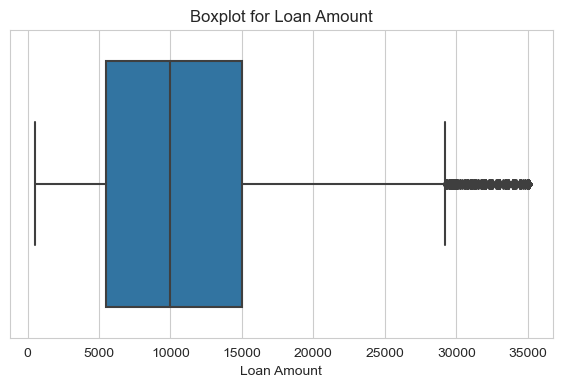

In [103]:
# loan_amnt             

fig, ax = plt.subplots(figsize=(7, 4))
sns.boxplot(x='loan_amnt', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Loan Amount')
ax.set_xlabel('Loan Amount')
plt.show()

Though there are some values far from general distribution, the distribution is pretty continous and there is no need to remove outliers / extreme values as this data will only help in univariate analysis in identifying loans that are significantly higher than the majority of the dataset and people from that segment could be defaulters

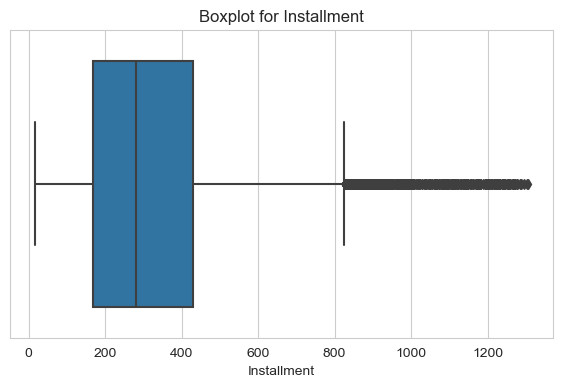

In [104]:
# Installment             

fig, ax = plt.subplots(figsize=(7, 4))
sns.boxplot(x='installment', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Installment')
ax.set_xlabel('Installment')
plt.show()

Whiskers: The spread of most of the data is on the whiskers which means the installment values are spread out.
Outliers: There is a good amount of points outside the whiskers. These may represent unusual loan terms or special cases worth further examination.

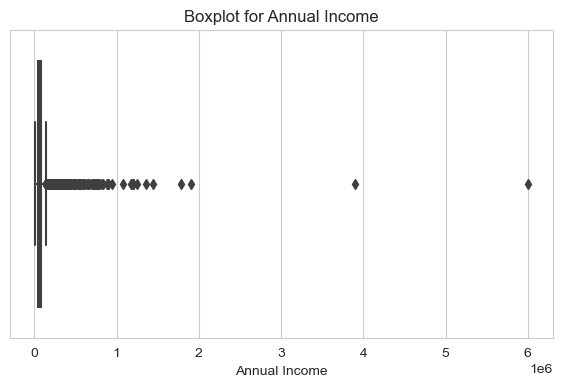

In [105]:
# annual_inc
fig, ax = plt.subplots(figsize=(7, 4))
sns.boxplot(x='annual_inc', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Annual Income')
ax.set_xlabel('Annual Income')
plt.show()

#### Clearly indincating the presence of outliers.
- So, Need to drop the outliers.
- Let's see the quantile info and take an appropriate action.
- We will calculate IQR to detect outliers.


In [106]:
Q1 = loan_data_cleaned['annual_inc'].quantile(0.25)
Q3 = loan_data_cleaned['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [107]:
loan_data_cleaned = loan_data_cleaned[(loan_data_cleaned['annual_inc'] >= lower_bound) & (loan_data_cleaned['annual_inc'] <= upper_bound)]

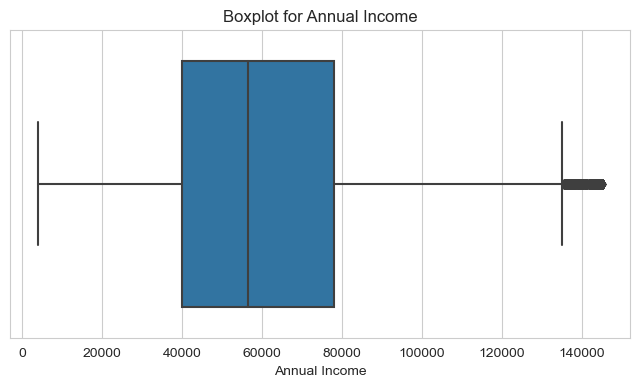

In [108]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='annual_inc', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Annual Income')
ax.set_xlabel('Annual Income')
plt.show()

#### The box plot of "annual_inc" data looks within general distribution now and the further analysis wont be impacted due to outliers detected previously.


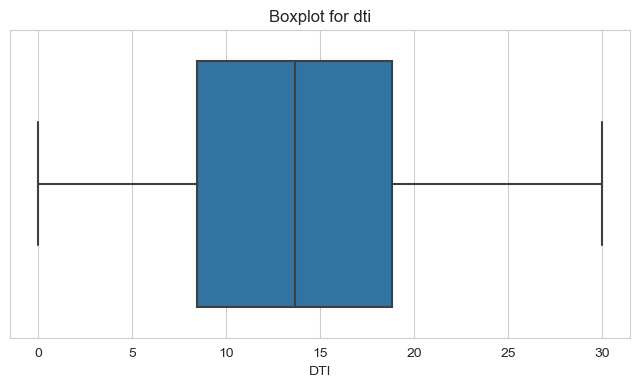

In [109]:
# DTI
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='dti', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for dti')
ax.set_xlabel('DTI')
plt.show()

The distribution is pretty continous and there is no need to remove outliers / extreme values for this column.

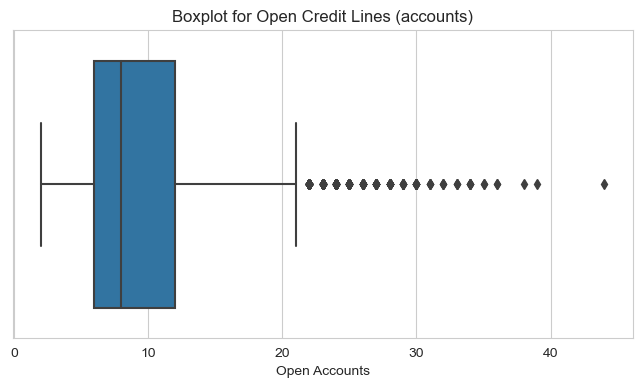

In [110]:
# open_acc    
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='open_acc', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Open Credit Lines (accounts)')
ax.set_xlabel('Open Accounts')
plt.show()

In [111]:
loan_data_cleaned.open_acc.value_counts().sort_values()

open_acc
44       1
38       1
39       1
35       2
36       2
33       3
32       3
31       4
34       5
29       8
30      11
27      20
28      20
26      27
25      52
24      67
23      83
22     131
21     223
20     252
19     348
18     482
2      558
17     655
16     842
15    1073
14    1366
3     1426
13    1743
12    2089
4     2246
11    2548
10    3004
5     3050
9     3501
8     3735
6     3760
7     3822
Name: count, dtype: int64

The middle 50% of the data (IQR) shows the number of open accounts varies widely around the median, hence most of the applicants have open accounts ranging between 7-12.
The whisker is a long one demonstrating that the spread of the most open accounts is between 12 - 22 amomgst the applicants
whereas only a few outliers (few applicants) have open accounts between 22 - 44 which indicates a higher potential for credit risk. 


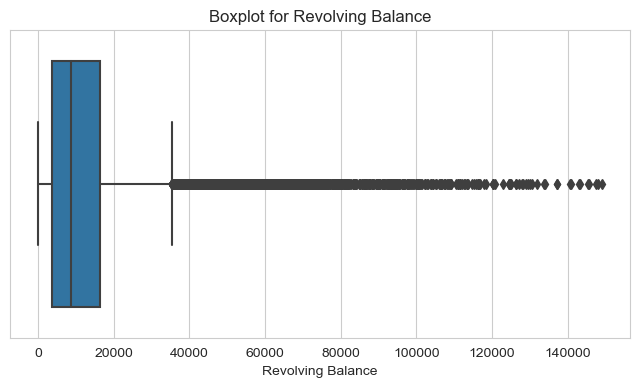

In [112]:
# revol_bal    
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='revol_bal', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Revolving Balance')
ax.set_xlabel('Revolving Balance')
plt.show()

1. A lot of outliers are seen here, but we can not drop this outliers, as we need this data to predict defaulters. 
2. The presence of many outliers above the upper whisker suggests that a subset of applicants have unusually high revolving balances. A high revolving balance can indicate that the borrower is heavily reliant on revolving credit accounts such as credit cards, which may affect their ability to repay loans. 
3. We will need to investigate the financial behavior of applicants with revolving balances above 38000. High revolving balances can indicate high credit utilization, which may be a risk factor for default.
4. The outliers may provide insights into what might cause a loan to default, especially if high revolving balances correlate with "charged-off".

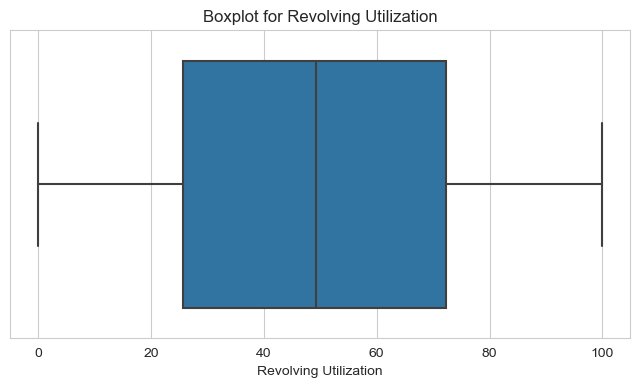

In [113]:
# revol_util    
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x='revol_util', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Revolving Utilization')
ax.set_xlabel('Revolving Utilization')
plt.show()

The distribution is pretty continous and there is no need to remove outliers / extreme values for this column.

In [114]:
# Lets check the data types for all the variables are in correct format now
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37164 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    37164 non-null  int64         
 1   loan_amnt             37164 non-null  int64         
 2   term                  37164 non-null  object        
 3   int_rate              37164 non-null  float64       
 4   installment           37164 non-null  float64       
 5   grade                 37164 non-null  object        
 6   emp_length            37164 non-null  int64         
 7   home_ownership        37164 non-null  object        
 8   annual_inc            37164 non-null  float64       
 9   verification_status   37164 non-null  object        
 10  issue_d               37164 non-null  datetime64[ns]
 11  loan_status           37164 non-null  object        
 12  purpose               37164 non-null  object        
 13  addr_state           

In [115]:
# Lets check if there is still any more null/NA values left
loan_data_cleaned.isnull().sum()

id                      0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [116]:
# Lets check the shape of the cleaned data frame.
loan_data_cleaned.shape

(37164, 24)

#### Now there are no more null values or variables with wrong datatypes. The dataset has been cleaned to address these data quality issues.

#### Since we have cleaned data set and have parameters for our EDA. let's proceed with Data Analysis

# Data Analysis

### Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. We will be performing the following steps:

1. Univariate Analysis: Analyze distributions of individual variables such as loan amount, interest rates, etc.
2. Bivariate/Multivariate Analysis: Explore relationships between features, especially how different variables like loan amount, term, grade, and income relate to the loan status ('Fully Paid', 'Charged-off', etc.).
3. Visualizations: Plot key variables to visualize distributions and relationships.




# Univariate Analysis

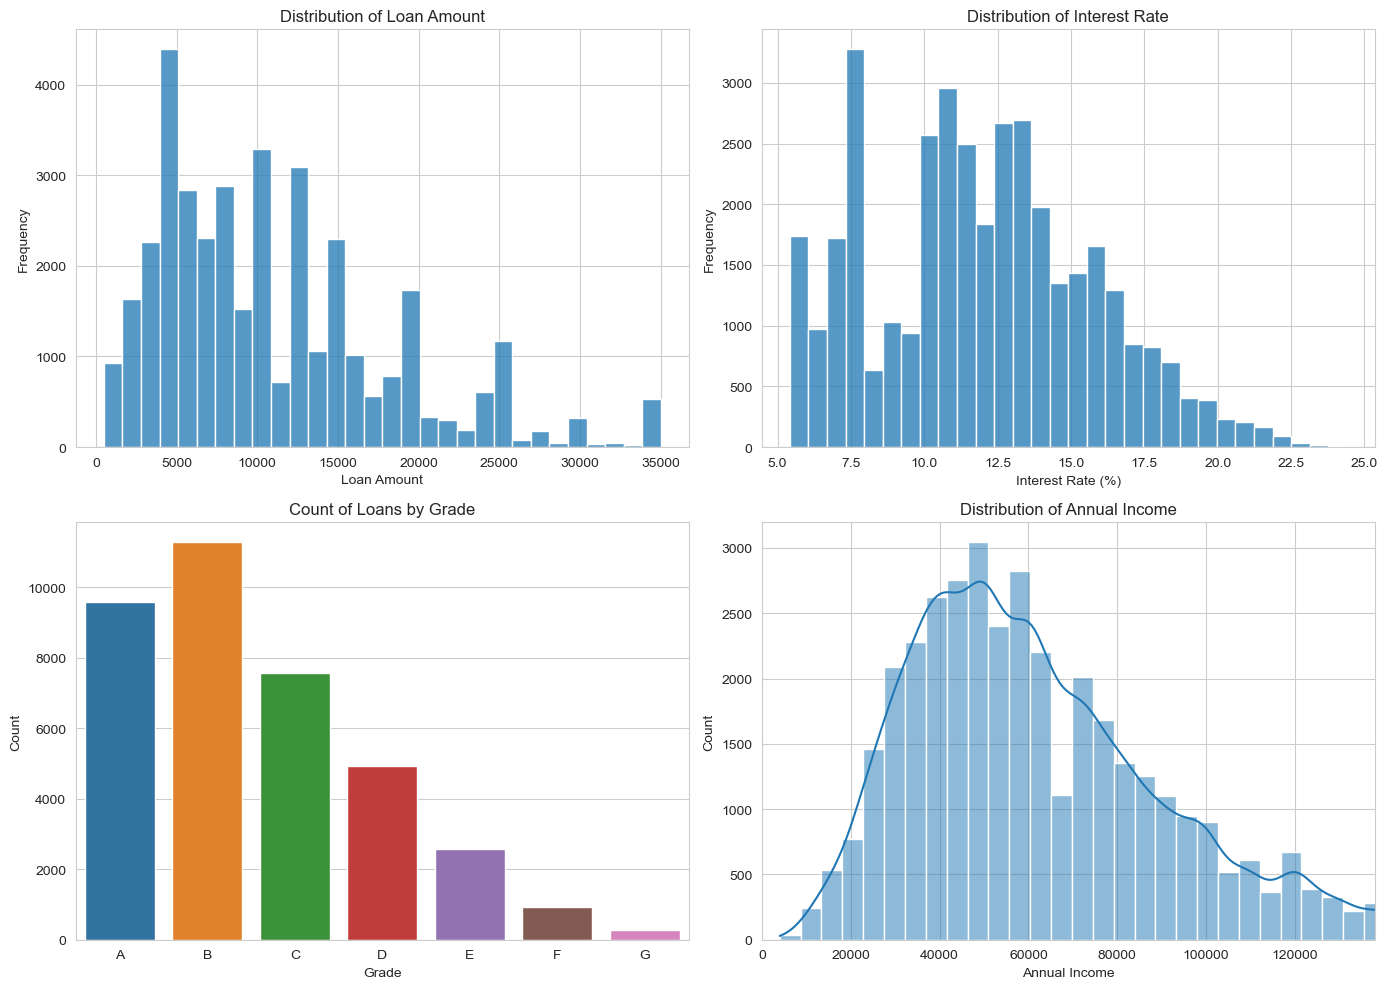

In [117]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure and axes for subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Test Case 1:- Plot distribution of loan amount
sns.histplot(loan_data_cleaned['loan_amnt'], bins=30, kde=False, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Loan Amount')
ax[0, 0].set_xlabel('Loan Amount')
ax[0, 0].set_ylabel('Frequency')

# Test Case 2:- Plot distribution of interest rate
sns.histplot(loan_data_cleaned['int_rate'], bins=30, kde=False, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Interest Rate')
ax[0, 1].set_xlabel('Interest Rate (%)')
ax[0, 1].set_ylabel('Frequency')

# Test Case 3:- Count plot for loan grades
sns.countplot(x='grade', data=loan_data_cleaned, order=sorted(loan_data_cleaned['grade'].unique()), ax=ax[1, 0])
ax[1, 0].set_title('Count of Loans by Grade')
ax[1, 0].set_xlabel('Grade')
ax[1, 0].set_ylabel('Count')

# Test Case 4: Plot the Histogram for Annual Income on ax[1, 1]
sns.histplot(loan_data_cleaned['annual_inc'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Annual Income')
ax[1, 1].set_xlabel('Annual Income')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_xlim(0, loan_data_cleaned['annual_inc'].quantile(0.99))

plt.tight_layout()
plt.show()

### Observations for test case 1- 4

1. Loan Amount Distribution:
Most loans are concentrated in lower amounts, suggesting that smaller loans are more common among borrowers.

2. Interest Rate Distribution:
The interest rates are mostly clustered between 10% and 15%. This range might be indicative of the typical risk associated with the majority of loans.

3. Loan Grades:
Loans are categorized across different grades (A to G). The count of loans decreases as the grade worsens, which likely reflects both the risk assessment of borrowers and the demand for loans across these risk categories.

4. Loan Status:
   - The distribution of annual income is heavily right-skewed with a long tail.
   - Most borrowers have annual incomes concentrated below a certain threshold, as indicated by the x-axis being limited to the 99th   percentile to avoid extreme outliers.
   - The presence of a peak around the lower income ranges suggests that many borrowers fall into this category.

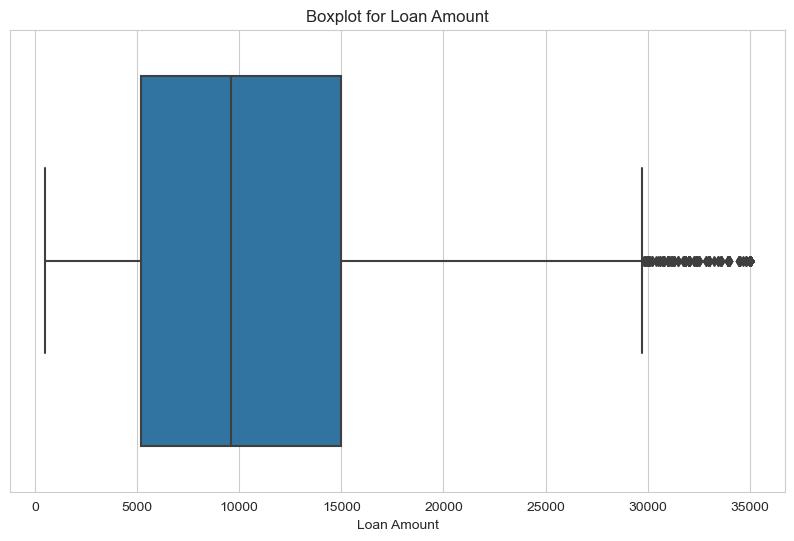

In [118]:
# Test Case 5: Boxplot for outlier detection in loan amount
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='loan_amnt', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Loan Amount')
ax.set_xlabel('Loan Amount')
plt.show()

### Observations For Test Case 5:

- The boxplot for loan amounts shows the distribution of loan values, highlighting the presence of outliers.
- The interquartile range (IQR), represented by the box, indicates that the middle 50% of loan amounts lie between approximately $5,000 and $20,000.
- The median loan amount is around $10,000, as indicated by the line within the box.

- The presence of several data points beyond the upper whisker suggests that there are numerous outliers in the dataset. These outliers are loans that are significantly higher than the majority of the dataset.
- The lower whisker starts around $0, indicating that there are no significant outliers on the lower end of loan amounts.

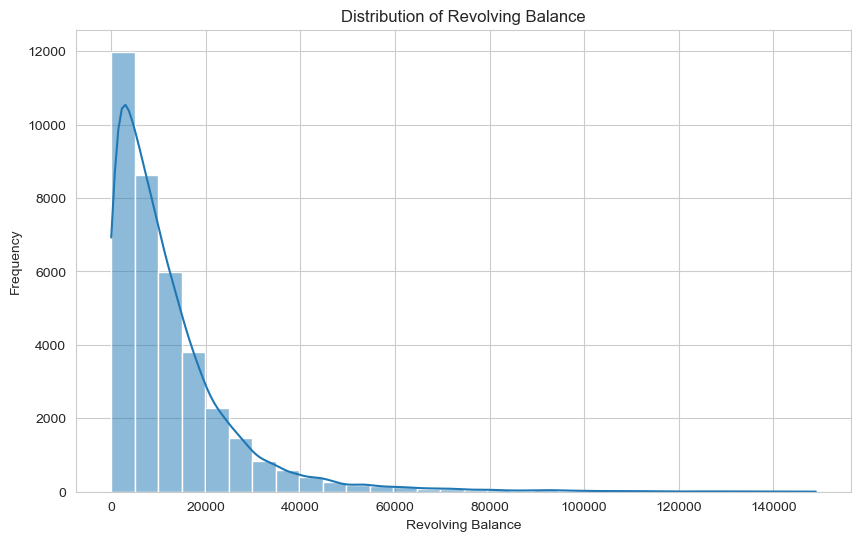

In [119]:
# Test Case 6: Histogram of Revolving Balance
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['revol_bal'], bins=30, kde=True)
plt.title('Distribution of Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.show()

### Observations For Test Case 6:

- The histogram for revolving balance (revol_bal) shows a right-skewed distribution.
- Most borrowers have revolving balances that are relatively low, with a high frequency observed in the lower ranges of the   balance.
- The distribution has a long tail, indicating that there are some borrowers with very high revolving balances.
- The presence of a kernel density estimate (KDE) line helps in visualizing the overall distribution shape, further confirming the right skewness.
- Firstly it implies that a significant portion of borrowers nearly 12000 people in the dataset have revolving balances within 5000.
- There is a long tail in the distribution, extending up to a maximum revolving balance of around 140,000,
- The concentration of borrowers with revolving balances in the lower range (0-5000) suggests that many borrowers maintain relatively low revolving balances compared to borrowers with higher balances. This could be seen as a positive indicator of responsible credit management.
- A high revolving balance can indicate that the borrower is heavily reliant on revolving credit accounts such as credit cards, which may affect their ability to repay loans.
- Borrowers with high revolving balances might be at a higher risk of default because they could be over-leveraged.

## Segmented Analysis  

Loan Purpose: Analyze how the purpose of the loan influences default rates.
Home Ownership: Explore the relationship between the borrower's home ownership status and loan default rates.
Annual Income: Investigate how varying income levels correlate with the likelihood of default.

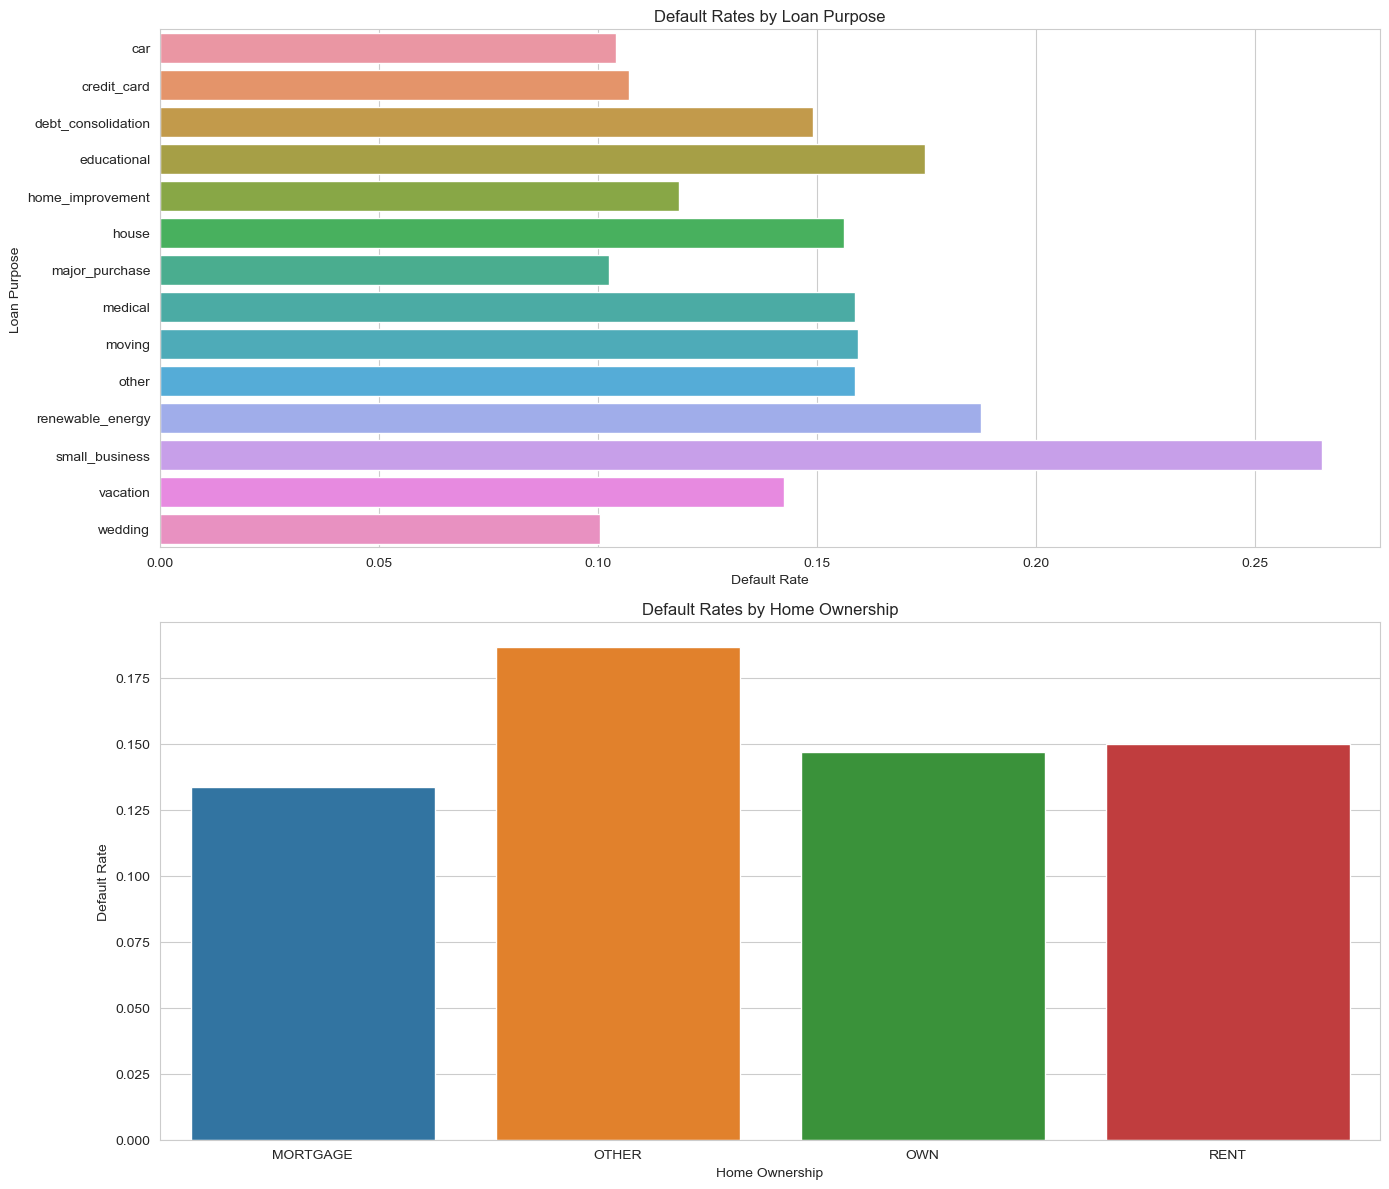

In [120]:
loan_data_cleaned = loan_data_cleaned.dropna(subset=['loan_status', 'purpose', 'home_ownership'])

# Define the figure and axes for subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Calculate default rates by loan purpose
default_rates_by_purpose = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('purpose').size() / loan_data_cleaned.groupby('purpose').size()

# Verify the calculated default rates by loan purpose
#print("Default Rates by Loan Purpose:")
#print(default_rates_by_purpose)

# Plot default rates by loan purpose
sns.barplot(x=default_rates_by_purpose.values, y=default_rates_by_purpose.index, ax=ax[0])
ax[0].set_title('Default Rates by Loan Purpose')
ax[0].set_xlabel('Default Rate')
ax[0].set_ylabel('Loan Purpose')

# Calculate default rates by home ownership
default_rates_by_home_ownership = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('home_ownership').size() / loan_data_cleaned.groupby('home_ownership').size()

# Verify the calculated default rates by home ownership
#print("Default Rates by Home Ownership:")
#print(default_rates_by_home_ownership)

# Plot default rates by home ownership
sns.barplot(x=default_rates_by_home_ownership.index, y=default_rates_by_home_ownership.values, ax=ax[1])
ax[1].set_title('Default Rates by Home Ownership')
ax[1].set_xlabel('Home Ownership')
ax[1].set_ylabel('Default Rate')

plt.tight_layout()
plt.show()

### Observatiosn for above testcase

### Default Rates by Loan Purpose:
1. Small Business Loans:

   - Have the highest default rate at approximately 25.98%. This indicates a higher risk associated with loans taken for small business purposes.
2. Renewable Energy Loans:

   - Have a significant default rate of approximately 18.45%. Although not as high as small business loans, this category still shows considerable risk.
3. Educational Loans:

   - Also exhibit a high default rate of around 17.23%, highlighting the financial challenges borrowers might face in repaying educational loans.
4. Debt Consolidation Loans:

   - Have a default rate of about 14.84%. While debt consolidation aims to simplify repayment, it still carries a notable risk.
5. Medical, Moving, and House Loans:

   - Show default rates ranging from 15.30% to 15.78%, indicating moderate risk levels.
6. Credit Card, Home Improvement, and Car Loans:

   - Exhibit lower default rates, ranging from approximately 10.33% to 11.66%, suggesting these purposes might be more manageable for borrowers.
7. Wedding Loans:

   - Have one of the lowest default rates at around 10.14%, indicating relatively low risk for this purpose.

### Default Rates by Home Ownership:
1. Other Home Ownership:

   - Category shows the highest default rate at approximately 18.37%, suggesting higher risk for non-standard home ownership statuses.
2. Renters:

   - Have a default rate of around 15.02%, indicating that renters might face more financial challenges in repaying loans compared to homeowners.
3. Own:

   - Borrowers who own their homes have a default rate of about 14.49%, which is slightly lower than renters.
4. Mortgage:

   - Borrowers with mortgages have the lowest default rate at approximately 13.18%, indicating relatively lower risk compared to other categories.
5. None:

   - The "None" category does not provide sufficient data for analysis (NaN value), indicating that this category might not be significantly represented in the dataset.

These observations can help in understanding the risk profiles of different loan purposes and the impact of home ownership status on default rates.

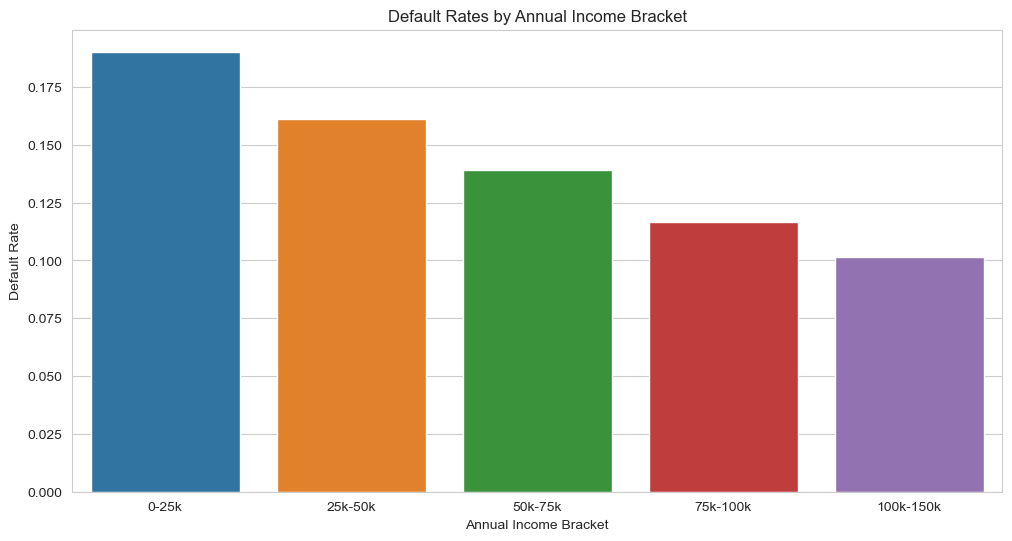

In [121]:
loan_data_cleaned['loan_status'] = loan_data_cleaned['loan_status'].str.strip()

# Categorize annual income into brackets for analysis
income_bins = [0, 25000, 50000, 75000, 100000, float('inf')]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k']
loan_data_cleaned['income_bracket'] = pd.cut(loan_data_cleaned['annual_inc'], bins=income_bins, labels=income_labels)

# Verify the categorization
#print("Income Brackets:")
#print(loan_data_cleaned[['annual_inc', 'income_bracket']].head())

# Calculate default rates by income brackets
default_rates_by_income = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('income_bracket').size() / loan_data_cleaned.groupby('income_bracket').size()

# Verify the calculated default rates
#print("Default Rates by Income Bracket:")
#print(default_rates_by_income)

# Plot default rates by income brackets
plt.figure(figsize=(12, 6))
sns.barplot(x=default_rates_by_income.index, y=default_rates_by_income.values)
plt.title('Default Rates by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Default Rate')
plt.show()

### Observations 

1. Higher Default Rate in Lower Income Bracket (0-25k):

   - The default rate is highest in the lowest income bracket (0-25k), approximately 18%. This suggests that borrowers with lower annual incomes are at a higher risk of defaulting on their loans.
2. Decreasing Default Rate with Increasing Income:

   - There is a noticeable trend of decreasing default rates as the income brackets increase.
   - The 25k-50k income bracket has a default rate of around 15%.
   - The 50k-75k income bracket has a default rate of approximately 13%.
   - The 75k-100k income bracket has a default rate close to 12%.
   - The 100k-150k income bracket has the lowest default rate, around 10%.
3. Income and Financial Stability:

   - These observations suggest a correlation between higher income levels and increased financial stability, leading to lower default rates. Borrowers in higher income brackets may have more disposable income and better capacity to repay loans.

### Recommendations:
1. Risk Management:

   - Lenders could use this information to adjust their risk management strategies. For example, they might require stricter credit checks or additional guarantees for borrowers in the lower income brackets.
2. Loan Terms Adjustments:

   - Offering different loan terms, such as higher interest rates or shorter repayment periods, for lower income brackets to mitigate the risk of default.
3. Targeted Financial Education:

   - Providing financial education and support to borrowers in lower income brackets to help them manage their finances better and reduce the risk of default.

### Derived Columns 

In [122]:
loan_data_cleaned['loan_to_income_ratio'] = loan_data_cleaned['loan_amnt'] / loan_data_cleaned['annual_inc']
loan_data_cleaned['int_rate_category'] = pd.cut(loan_data_cleaned['int_rate'], 
                                                 bins=[0, 10, 15, 20, 100], 
                                                 labels=['Low', 'Medium', 'High', 'Very High'])

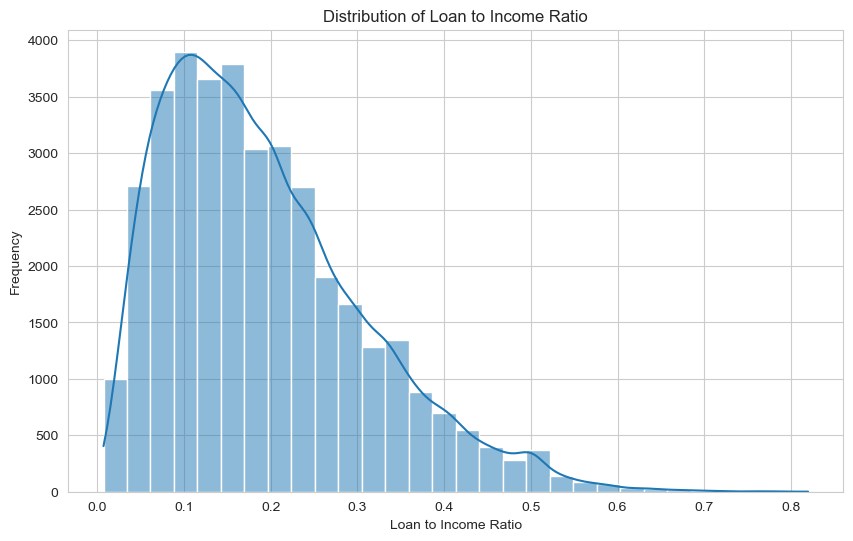

In [123]:
#Test Case 1:- Loan to Income Ratio
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_to_income_ratio'], bins=30, kde=True)
plt.title('Distribution of Loan to Income Ratio')
plt.xlabel('Loan to Income Ratio')
plt.ylabel('Frequency')
plt.show()

### Observations 

1. Peak at Lower Ratios:

   - The graph shows a peak in the loan to income ratio around 0.1 to 0.2. This suggests that many borrowers have loan amounts that are roughly 10% to 20% of their annual income.
2. Decreasing Trend:

   - The frequency of borrowers decreases as the loan to income ratio increases. This indicates that higher ratios are less common among borrowers.
3. Long Tail:

   - There is a long tail extending towards higher ratios, up to around 0.8. This tail suggests that although less common, there are still some borrowers with higher loan to income ratios.
4. Right-Skewed Distribution:

   - The distribution is right-skewed, meaning there are fewer borrowers with high loan to income ratios compared to those with lower ratios.

5. Potential Risk Indicator:

   - Borrowers with higher loan to income ratios might be at greater risk of financial stress, as a larger portion of their income is committed to loan repayments.

### Recommendations:
1. Focus on High Ratios:

   - Lenders should pay close attention to borrowers with higher loan to income ratios, as they might be more prone to default.
2. Financial Counseling:

   - Providing financial counseling and budgeting assistance to borrowers with higher ratios could help reduce their risk of default.
3. Loan Approval Policies:

   - Consider implementing stricter loan approval criteria for borrowers with high loan to income ratios to mitigate potential risks.
4. Regular Monitoring:

   - Regularly monitor and review the loan to income ratios of existing borrowers to proactively manage potential risks.

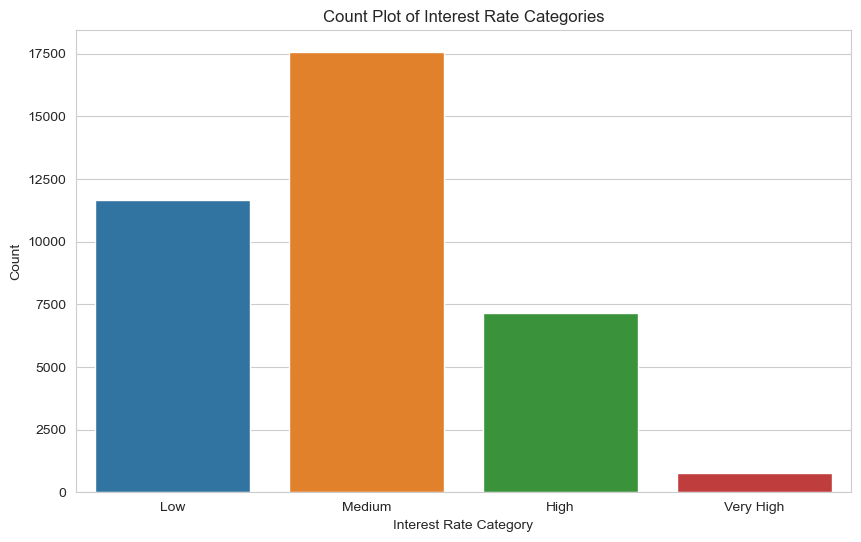

In [124]:
#Test Case 2:- Count Plot of Interest Rate Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='int_rate_category')
plt.title('Count Plot of Interest Rate Categories')
plt.xlabel('Interest Rate Category')
plt.ylabel('Count')
plt.show()

### Observations 

### Count Plot of Interest Rate Categories
-The count plot shows the distribution of loans across different interest rate categories.
 1. Low Interest Rate:
    - The "Low" interest rate category (0-10%) has the fewest loans, indicating that fewer borrowers qualify for or are offered        the lowest rates.
 2. Medium and High Interest Rates:
    - The "Medium" (10-15%) and "High" (15-20%) interest rate categories have a larger number of loans, suggesting that a             significant portion of borrowers fall into these categories.
 3. Very High Interest Rate:
    - The "Very High" interest rate category (>20%) also has a substantial number of loans, indicating that a considerable             number of borrowers are offered or accept higher interest rates, possibly due to higher perceived credit risk.

This distribution highlights the concentration of loans in the medium to high interest rate categories, reflecting the lending risk profile and the spread of interest rates offered to borrowers. ​

In [125]:
loan_data_cleaned['dti_category'] = pd.cut(loan_data_cleaned['dti'], 
                                           bins=[0, 10, 20, 30], 
                                           labels=['Low', 'Medium', 'High',])

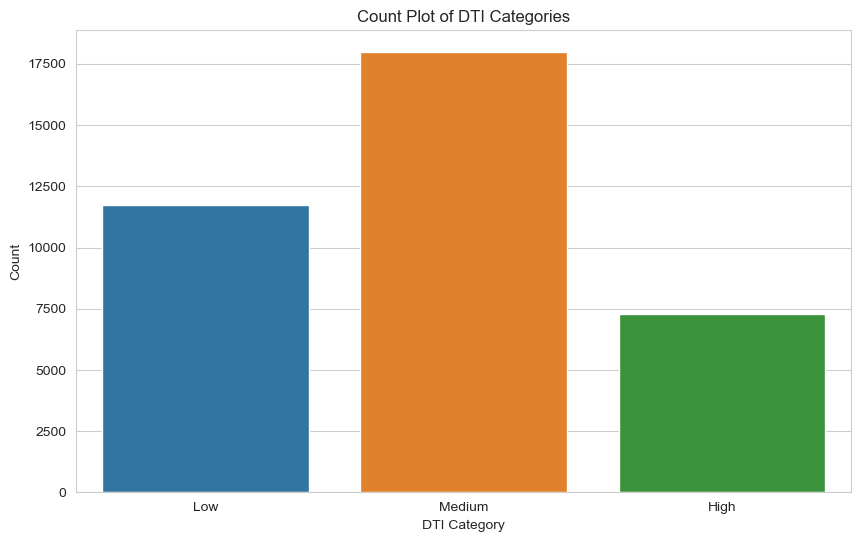

In [126]:
# Test Case 3: Distribution of DTI Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='dti_category')
plt.title('Count Plot of DTI Categories')
plt.xlabel('DTI Category')
plt.ylabel('Count')
plt.show()

### Observations 

### Count Plot of DTI Categories
- The count plot shows the distribution of borrowers across different debt-to-income (DTI) ratio categories.

1. Low and High DTI Categories:

   - The "Low" DTI category has a considerable number of borrowers, with the count over 10,000, suggesting a good portion of borrowers maintain low debt levels compared to their income.
   - The "High" DTI category has the least number of borrowers, with the count slightly over 7,500. This indicates that fewer borrowers are in high debt situations relative to their income.
2. Medium and High DTI:

   - The majority of the loans fall into the "Medium" DTI (Debt-to-Income) category, with the count exceeding 17,500. This indicates that a significant portion of borrowers have a moderate level of debt relative to their income.
3. Implications for Loan Approval:

   - The distribution suggests that most borrowers are not over-leveraged, as the majority fall into the low to medium DTI categories. This could imply a lower overall risk for the lender's portfolio.
4. Potential Risk Management:

   - Borrowers in the "High" DTI category should be monitored closely, as they might be more vulnerable to financial stress and potential default.
   
### Recommendations:
1. Targeted Support for High DTI Borrowers:

   - Providing financial advice and support to borrowers in the high DTI category could help mitigate the risk of default.
2. Stringent Loan Approval Criteria:

   - Implementing stricter loan approval criteria for borrowers in the high DTI category might be necessary to ensure they do not overextend themselves financially.
3. Regular Monitoring:

   - Regularly review and monitor the DTI ratios of borrowers to ensure early intervention if they move towards higher debt levels.

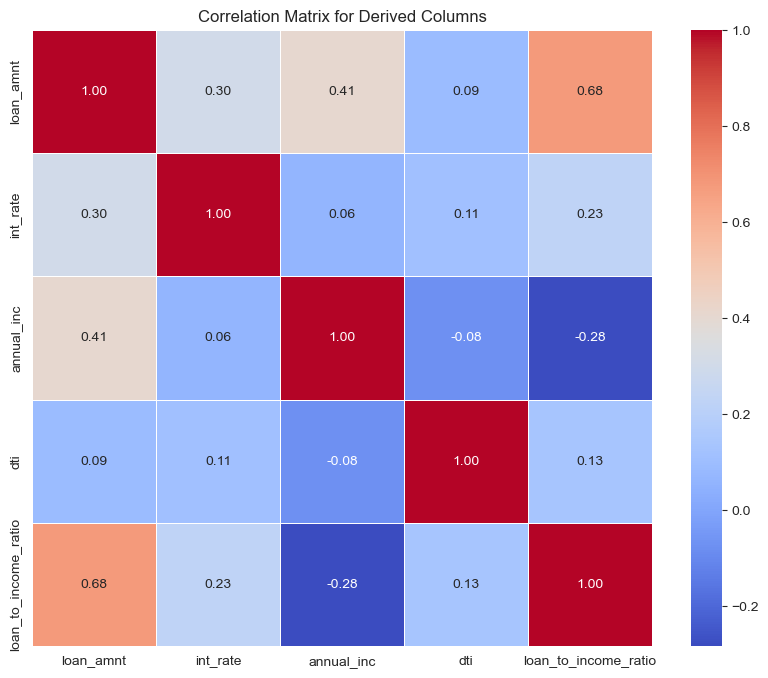

In [127]:
# Test Case 4: Correlation Matrix for Derived Columns
derived_corr_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_to_income_ratio']
derived_corr_matrix = loan_data_cleaned[derived_corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(derived_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Derived Columns')
plt.show()

### Observations 

### Correlation Matrix for Derived Columns
1. Loan Amount and Loan to Income Ratio:

   - There is a strong positive correlation (0.68) between the loan amount and the loan to income ratio. This indicates that as the loan amount increases, the loan to income ratio also increases significantly.
2. Loan Amount and Annual Income:

   - A moderate positive correlation (0.41) exists between the loan amount and annual income. This suggests that higher income borrowers tend to take out larger loans.
3. Loan Amount and Interest Rate:

   - The correlation between loan amount and interest rate is moderately positive (0.30), implying that larger loans may be associated with higher interest rates.
4. Interest Rate and Loan to Income Ratio:

   - There is a moderate positive correlation (0.23) between interest rate and loan to income ratio, indicating that higher loan to income ratios are associated with higher interest rates.
5. Annual Income and Loan to Income Ratio:

   - A moderate negative correlation (-0.28) exists between annual income and loan to income ratio. This suggests that higher income borrowers typically have lower loan to income ratios, indicating a more manageable debt level relative to their income.
6. Debt-to-Income Ratio (DTI) Relationships:

   - The DTI shows weak correlations with other variables: 0.09 with loan amount, 0.11 with interest rate, -0.08 with annual income, and 0.13 with loan to income ratio. This indicates that DTI is relatively independent of these factors in this dataset.

### Recommendations:
1. Risk Assessment Based on Correlations:

   - The strong correlation between loan amount and loan to income ratio can be used for risk assessment. Higher ratios may indicate higher risk and warrant closer scrutiny.
2. Interest Rate Adjustments:

   - The moderate positive correlation between interest rate and loan to income ratio suggests that lenders might adjust interest rates based on the borrower's debt level relative to their income.
3. Loan Approval Criteria:

   - Use the observed correlations to refine loan approval criteria, particularly focusing on loan amounts, interest rates, and the borrower's income to ensure they do not take on unmanageable debt levels.

## Bivariate Analysis

1. Relationship between Loan Amount and Loan Status.
2. Impact of Interest Rate on Loan Status.
3. Influence of Loan Grade on Default Rates.

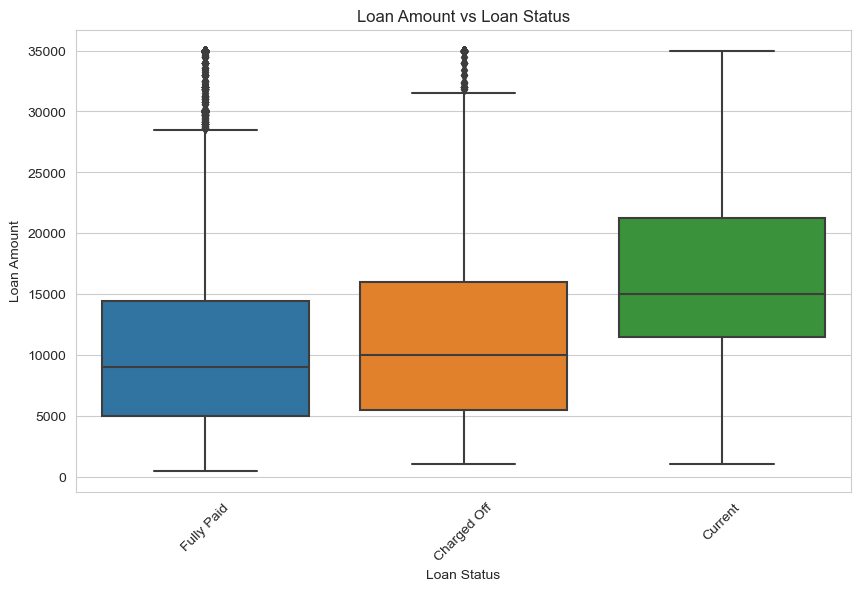

In [151]:
# Set the aesthetic style of the plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

### Observations For Test Case 1:

1. Fully Paid Loans:

   - The median loan amount for Fully Paid loans is around $10,000.
   
   - The interquartile range (IQR) spans from approximately $5,000 to $15,000.
   - There are outliers extending up to $35,000, but most fully paid loans are below $20,000.
2. Charged Off Loans:

    - The median loan amount for Charged Off loans is also around $10,000,
       similar to Fully Paid loans.
       
    - The IQR is slightly lower, ranging from about $5,000 to $15,000.
    - There are fewer high-value outliers compared to Fully Paid loans, with a significant number of Charged Off loans                 clustering below $20,000.
3. Current Loans:

    - The median loan amount for Current loans is higher, around $15,000.
   
    - The IQR is broader, spanning from approximately $10,000 to $25,000.
    - There are significant outliers, with some loans extending up to $35,000, indicating that larger loans are still in repayment.

### Insights and Recommendations:
1. Comparison Between Fully Paid and Charged Off Loans:

   - Both Fully Paid and Charged Off loans have similar median amounts and IQRs, indicating that loan amount alone might not be a strong predictor of default.
   - However, the presence of fewer high-value outliers in Charged Off loans suggests that while large loans are fully repaid, they are less frequently defaulted on.
2. Current Loans:

   - The higher median and broader IQR for Current loans indicate that borrowers are currently managing larger loans.
   - The presence of high-value outliers suggests ongoing monitoring is crucial, as these loans are yet to be fully repaid.
3. Risk Management:

   - Larger loan amounts, while often managed successfully (as indicated by Fully Paid loans), require close monitoring, especially those still marked as Current.
   - Implementing stricter risk assessment protocols for larger loans could help mitigate potential defaults.
4. Targeted Interventions:

   - For high-value Current loans, consider offering financial counseling and support to ensure these loans transition to Fully Paid status.
   - For mid-range loan amounts (around $10,000 to $15,000), analyze other risk factors such as borrower income, DTI ratio, and loan purpose to better predict and manage potential defaults.

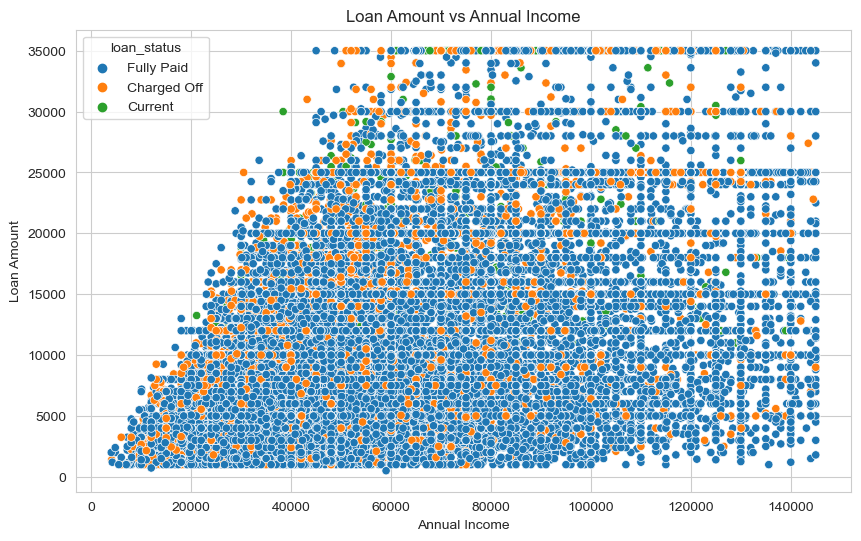

In [129]:
#Test Case 2:- Scatter Plot for Loan Amount vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=loan_data_cleaned)
plt.title('Loan Amount vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

### Observatiosn for Test case 2:-

1. Positive Correlation:

   - There is a noticeable positive correlation between loan amount and annual income. As annual income increases, the loan amount also tends to increase.
2. Loan Status Distribution:

   - The scatter plot distinguishes between different loan statuses: Fully Paid, Charged Off, and Current.
   - Most of the loans are Fully Paid (blue points), indicating successful repayment across various income levels and loan amounts.
   - Charged Off loans (orange points) are spread across different income levels, but there is a noticeable concentration in lower income brackets and higher loan amounts.
   - Current loans (green points) are scattered, showing ongoing repayments.
2. Income Brackets and Loan Amounts:

   - Borrowers with annual incomes up to $40,000 tend to have smaller loan amounts, mostly below $20,000.

   - Higher loan amounts (above $20,000) are more common among borrowers with annual incomes above $60,000.
3. Risk Concentration:

   - There is a higher density of Charged Off loans in the lower and mid-income brackets ($20,000 to $60,000) and for loan amounts ranging from $5,000 to $20,000.
   - This suggests that borrowers in these income brackets and loan amounts are at a higher risk of default.
4. Loan Approval Strategy:

   - The plot can help lenders identify riskier segments. For instance, loans with higher amounts relative to lower incomes may need stricter approval criteria or additional guarantees.

### Recommendations:
1. Enhanced Risk Assessment:

   - Implement enhanced risk assessment procedures for borrowers in the mid-income brackets taking higher loan amounts.
2. Adjust Loan Terms:

   - Consider adjusting loan terms, such as interest rates and repayment periods, based on the borrower's income level and loan amount to manage risk better.
3. Focused Financial Support:

   - Provide targeted financial counseling and support to borrowers in the risk-prone segments to help them manage their loans better and reduce default rates.

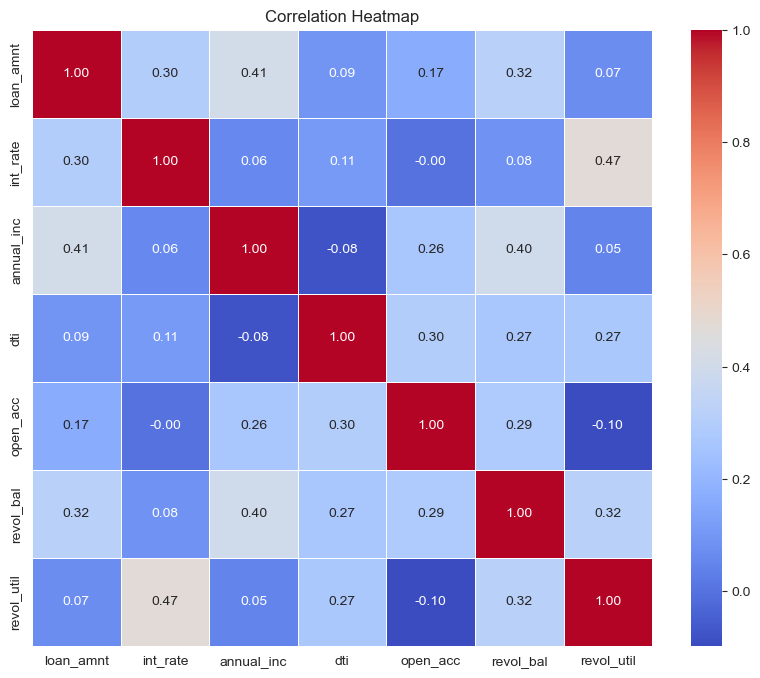

In [130]:
#Test Case 3:- Correlation Analysis for Numerical Variables
corr_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util']
corr_matrix = loan_data_cleaned[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Observatiosn for Test case 3:-

1. Loan Amount:

   1. Annual Income: 
      - There is a moderate positive correlation (0.41) between loan amount and annual income. This indicates that higher income borrowers tend to take out larger loans.
   2. Revolving Balance (revol_bal): 
      - There is a moderate positive correlation (0.32) between loan amount and revolving balance, suggesting that higher loan amounts are associated with higher revolving balances.
2. Interest Rate (int_rate):

   1. Revolving Utilization (revol_util): 
      - There is a moderate positive correlation (0.47) between interest rate and revolving utilization. This suggests that higher utilization rates are associated with higher interest rates.
   2. Loan Amount: 
      - The correlation between loan amount and interest rate is moderately positive (0.30), implying that larger loans may come with higher interest rates.
3. Debt-to-Income Ratio (dti):

   1. Open Accounts (open_acc): 
      - There is a moderate positive correlation (0.30) between DTI and the number of open accounts, indicating that borrowers with more open accounts tend to have higher debt-to-income ratios.
   2. Revolving Balance (revol_bal) and Revolving Utilization (revol_util): 
      - Both show weak to moderate positive correlations with DTI (0.27). This suggests that higher DTI ratios are associated with higher revolving balances and utilization.
4. Annual Income:

   1. Open Accounts (open_acc): There is a weak positive correlation (0.26) between annual income and the number of open accounts, indicating that higher income borrowers may have more open accounts.
   2. Revolving Balance (revol_bal): There is a moderate positive correlation (0.40) between annual income and revolving balance, suggesting that higher income is associated with higher revolving balances.
5. Revolving Balance (revol_bal):

   - Revolving Utilization (revol_util): 
     - There is a moderate positive correlation (0.32) between revolving balance and revolving utilization, indicating that higher balances are associated with higher utilization rates.

### Recommendations:
1. Interest Rate Adjustments:

   - Given the positive correlation between interest rates and revolving utilization, lenders might consider adjusting interest rates based on utilization rates to better manage risk.
2. Loan Approval Criteria:

   - Use the correlations to refine loan approval criteria, particularly focusing on loan amounts, revolving balances, and annual income to ensure borrowers do not overextend financially.
3. Risk Management:

   - Monitor borrowers with higher DTI ratios, open accounts, and revolving balances closely, as these factors are associated with higher risk profiles.
4. Credit Counseling:

   - Provide credit counseling for borrowers with high revolving utilization and balances to help them manage their debt better and reduce default risks.

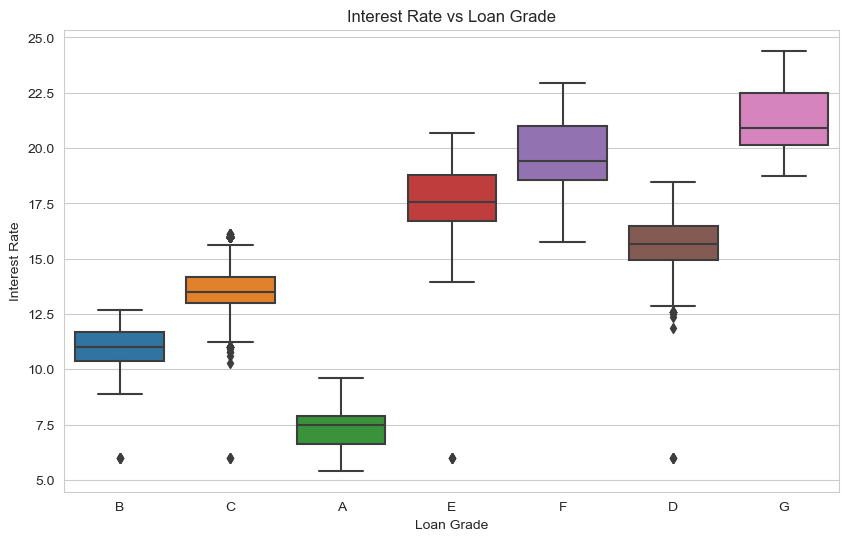

In [131]:
#Test Case 4:- Box Plot for Interest Rate vs. Loan Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=loan_data_cleaned)
plt.title('Interest Rate vs Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

### Observations For test Case 4:-

1. Loan Grades: 
   - Lower grades (e.g., D, E, F) are associated with higher interest rates, while higher grades (A, B) have lower interest rates.
2. Interest Rate Spread: 
   - There is a noticeable spread within each grade, suggesting that other factors also influence the interest rate beyond the loan grade.

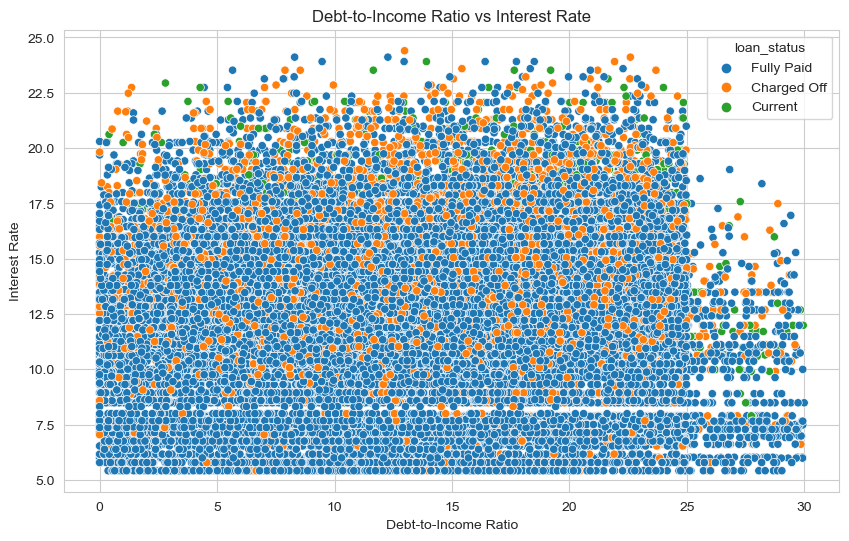

In [132]:
# Test Case 5: Scatter Plot for Debt-to-Income Ratio vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dti', y='int_rate', hue='loan_status', data=loan_data_cleaned)
plt.title('Debt-to-Income Ratio vs Interest Rate')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Interest Rate')
plt.show()

### Observations for Test Case 5:- 

1. General Trend:

   - There is no strong linear trend visible between the debt-to-income (DTI) ratio and the interest rate. This suggests that DTI is not the sole determining factor for the interest rate assigned to loans.
2. Interest Rate Levels:

   - Interest rates appear to be segmented into distinct bands (e.g., 7.5%, 10%, 12.5%, 15%, 17.5%, 20%, and 22.5%). This indicates that interest rates might be assigned in specific increments rather than a continuous range.
3. Loan Status Distribution:

   1. Fully Paid (blue points): 
      - These are spread across all DTI ratios and interest rate levels, indicating successful repayments across a broad spectrum.
   2. Charged Off (orange points): 
      - These points are distributed across all DTI ratios and interest rate levels, with a noticeable presence in the higher interest rate bands (17.5% and above). This suggests that loans with higher interest rates are more prone to default.
   3. Current (green points): 
      - These points are scattered across the plot, indicating ongoing repayments across various DTI ratios and interest rates.
4. Higher Interest Rates:

   - There is a concentration of Charged Off loans in the higher interest rate range (17.5% and above). This indicates a higher risk of default for loans with higher interest rates, irrespective of the DTI ratio.
5. DTI and Risk:

   - Loans with higher DTI ratios (above 15) have a mix of all three loan statuses (Fully Paid, Charged Off, and Current), suggesting that while DTI is a factor, it does not singularly determine loan performance.

### Recommendations:
1. Risk-Based Interest Rates:

   - Consider assigning interest rates based on a combination of factors, including DTI, to better manage risk. Higher interest rates could be reserved for loans with higher DTI ratios and other risk indicators.
2. Focused Monitoring:

   - Pay close attention to loans with high-interest rates and high DTI ratios. These segments appear more prone to defaults and might benefit from proactive monitoring and support.
3. Loan Status Segmentation:

   - Use the insights from the scatter plot to segment borrowers and design targeted strategies for each segment, such as offering financial counseling for high-risk segments.

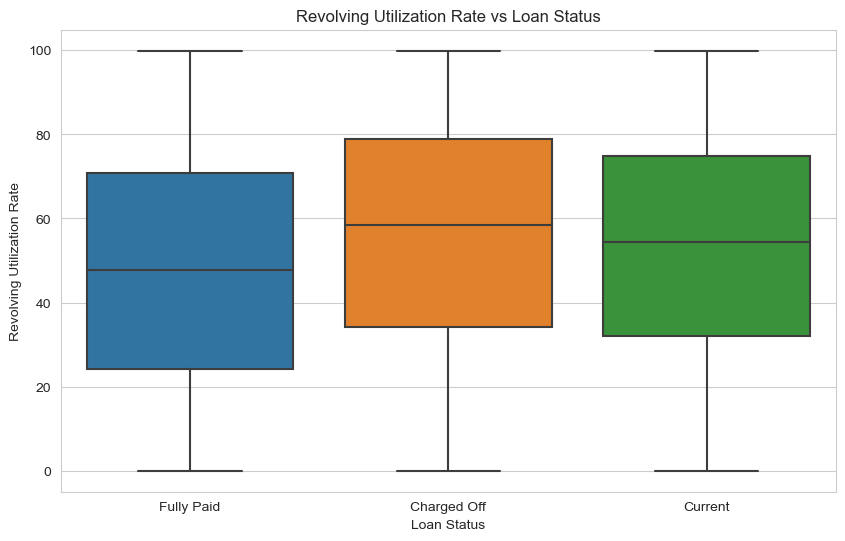

In [133]:
# Test Case 6: Box Plot for Revolving Utilization Rate vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=loan_data_cleaned)
plt.title('Revolving Utilization Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Utilization Rate')
plt.show()

### Observations For Test Case 6:- 

1. Charged-Off Loans: 
   - Charged-off loans have higher median revolving utilization rates compared to fully paid and current loans.

2. Fully Paid Loans: 
   - Fully paid loans tend to have lower revolving utilization rates, indicating better credit utilization management.

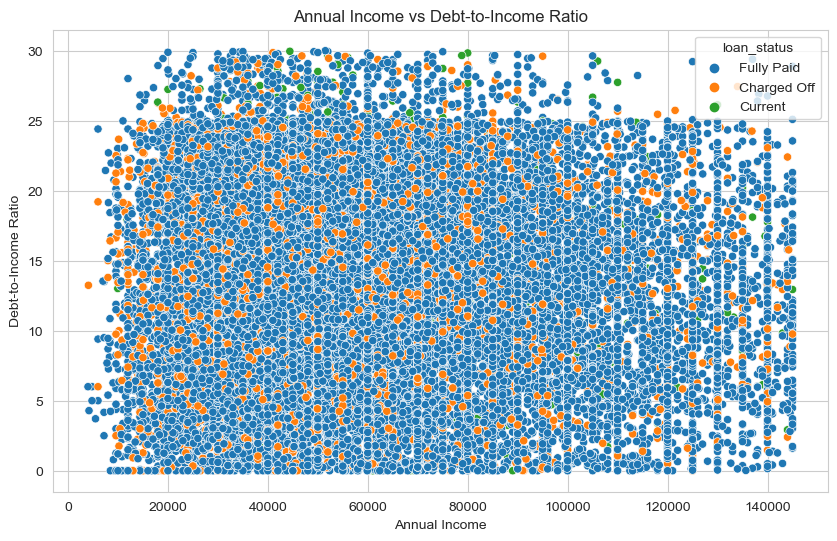

In [134]:
# Test Case 7: Scatter Plot for Annual Income vs. Debt-to-Income Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='dti', hue='loan_status', data=loan_data_cleaned)
plt.title('Annual Income vs Debt-to-Income Ratio')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

### Observations For Test Case 7:- 

1. Wide Distribution:

   - The data points are widely distributed across the entire range of annual incomes and DTI ratios. This indicates a diverse set of borrowers with varying income levels and debt burdens.
2. Debt-to-Income Ratio Limits:

   - The DTI ratios appear to be capped at 30, with a significant number of borrowers reaching this upper limit. This cap might be due to lending policies or data reporting practices.
3. Loan Status Distribution:

   1. Fully Paid (blue points): 
      - These are widely scattered across all income levels and DTI ratios, indicating successful repayments regardless of income or debt levels.
   2. Charged Off (orange points): 
      - These points are also widely distributed but show a slight concentration at higher DTI ratios and lower income levels. This suggests that higher DTI ratios and lower incomes might be associated with a higher risk of default.
   3. Current (green points): These points are less frequent and scattered across the plot, indicating ongoing repayments across different income and DTI levels.
4. Income and DTI Correlation:

   - There is no strong linear correlation between annual income and DTI ratio visible in the scatter plot. Borrowers with both high and low incomes have varying DTI ratios.
5. Risk Indicators:

   - Higher DTI ratios, particularly those close to the upper limit of 30, show a higher presence of Charged Off loans. This suggests that DTI ratio is a significant risk indicator.

### Recommendations:
1. Monitor High DTI Borrowers:

   - Pay close attention to borrowers with high DTI ratios, especially those nearing the upper limit, as they appear more prone to default.
2. Adjust Lending Criteria:

   - Consider stricter lending criteria or additional guarantees for borrowers with high DTI ratios and lower income levels to mitigate the risk of default.
3. Provide Financial Counseling:

   - Offer financial counseling and support to borrowers with high DTI ratios to help them manage their debt better and reduce default risks.
4. Segmentation and Targeting:

   - Use the insights from the scatter plot to segment borrowers into different risk categories and design targeted strategies for each segment, such as tailored repayment plans or interest rate adjustments.

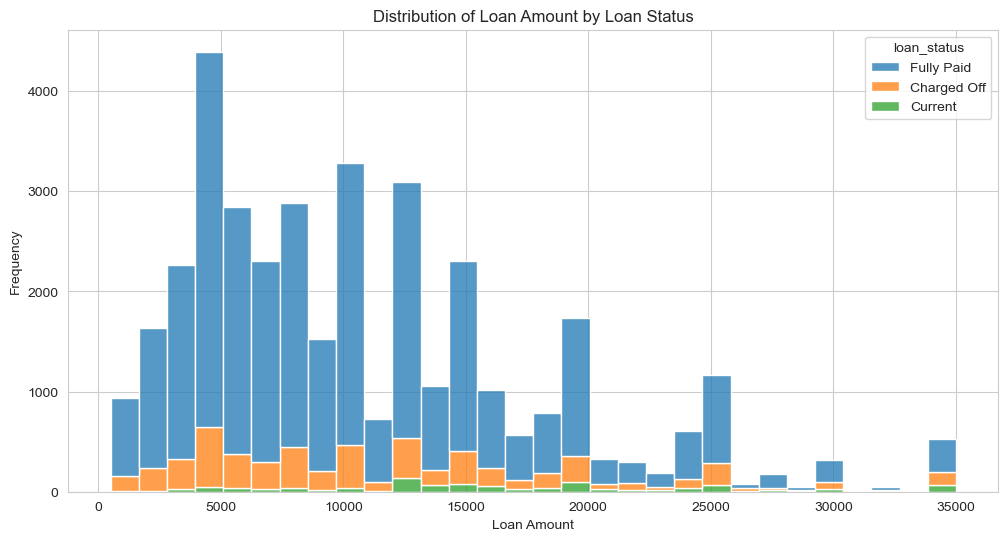

In [135]:
# Test Case 8: Distribution of Loan Amount by Loan Status
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_data_cleaned, x='loan_amnt', hue='loan_status', multiple='stack', bins=30)
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

### Observations 

### Distribution of Loan Amount by Loan Status
- The distribution of loan amounts is shown for different loan statuses, with loans categorized as either "Fully Paid" or "Charged Off."
1. Fully Paid Loans:
   - The majority of fully paid loans are concentrated in the lower loan amount ranges, particularly between $5,000 and $15,000.
   - There is a noticeable peak around $10,000 for fully paid loans, indicating that many borrowers successfully repay loans of      this amount.
2. Charged Off Loans:
   - Charged off loans are also present across a similar range but have a slightly different distribution.
   - There is a higher frequency of charged off loans in the lower loan amount ranges, suggesting that smaller loans are also at risk of default.
   - The distribution of charged off loans does not exhibit as sharp a peak as fully paid loans, indicating a more spread-out distribution across various loan amounts.

This histogram provides insights into the relationship between loan amounts and their repayment status, highlighting that while many smaller loans are successfully repaid, there is also a significant presence of defaults across various loan amounts. This information can help lenders assess risk and develop strategies for loan approval and management.

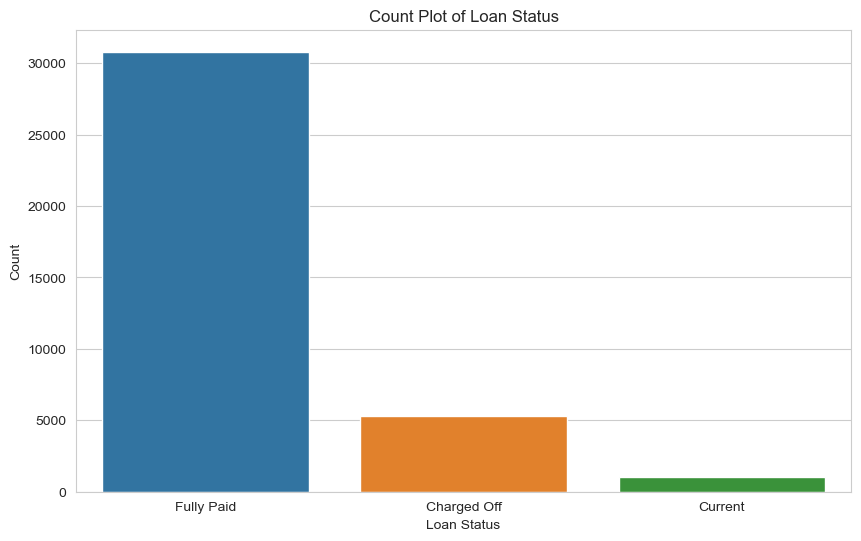

In [136]:
 # Test Case 9: Count Plot of Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='loan_status')
plt.title('Count Plot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()    

### Observations 

### Count Plot of Loan Status
- The count plot shows the distribution of loans by their status.
1. Fully Paid Loans:
   - A significant majority of the loans are categorized as "Fully Paid." This indicates that most borrowers successfully repay their loans.
2. Charged Off Loans:
   - A smaller but still notable portion of loans are categorized as "Charged Off." This represents loans that were defaulted on and written off by the lender.

This plot highlights the overall success rate of loan repayments within the dataset, with most loans being fully repaid but a non-negligible portion resulting in defaults. This information is crucial for understanding the risk profile of the loan portfolio and for developing strategies to minimize defaults. 

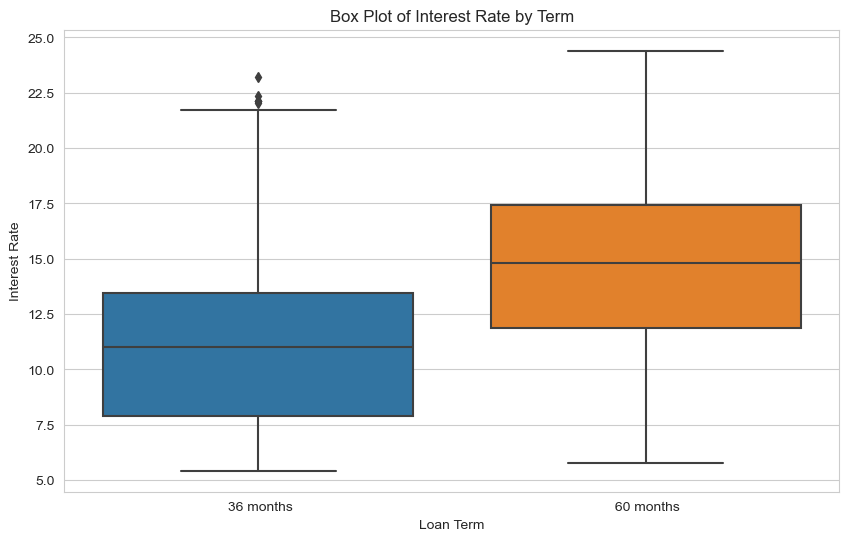

In [137]:
# Test Case 10: Box Plot of Interest Rate by Term
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='term', y='int_rate')
plt.title('Box Plot of Interest Rate by Term')
plt.xlabel('Loan Term')
plt.ylabel('Interest Rate')
plt.show()

### Observations 

### Box Plot of Interest Rate by Term
1. 36 Months Term:

- The median interest rate for loans with a 36-month term is lower compared to loans with a 60-month term.
- The interquartile range (IQR) for the 36-month term is narrower, indicating less variability in interest rates.
- There are fewer outliers, suggesting that interest rates for 36-month loans are more consistent.

2. 60 Months Term:

- The median interest rate for loans with a 60-month term is higher than for the 36-month term.
- The IQR for the 60-month term is wider, indicating greater variability in interest rates.
- There are more outliers, suggesting that interest rates for 60-month loans vary more significantly.

This box plot indicates that longer-term loans (60 months) tend to have higher and more variable interest rates compared to shorter-term loans (36 months). This is likely due to the increased risk associated with longer loan durations. ​

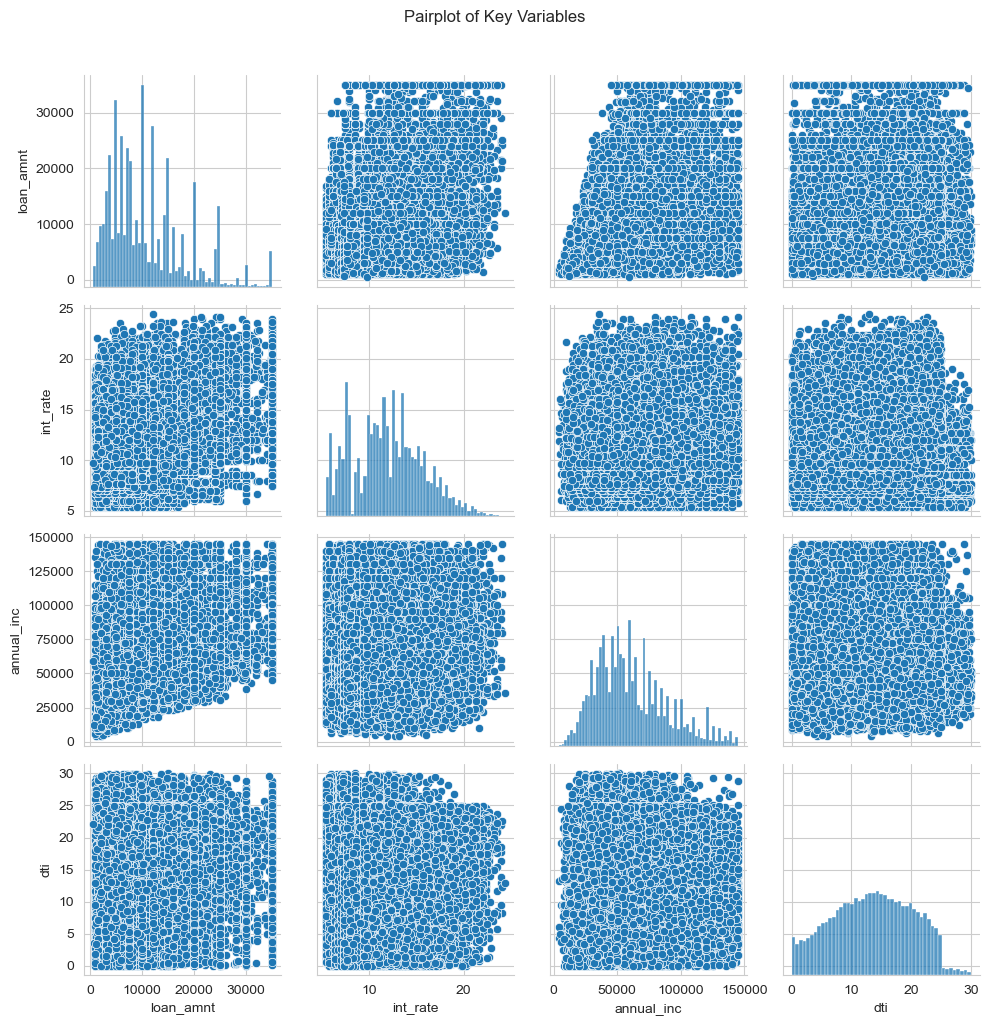

In [148]:
# Test Case 11: Pairplot of Key Variables
key_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
pairplot = sns.pairplot(loan_data_cleaned[key_vars])

# Adjust the layout and add the title
pairplot.fig.suptitle('Pairplot of Key Variables', y=1.02)
pairplot.fig.tight_layout()

plt.show()

### Observations 

### Pairplot of Key Variables
1. Loan Amount Distribution:

    - The distribution of loan amounts is right-skewed, with most loans falling below $20,000. 
      A few loans are significantly higher, creating a long tail.
2. Interest Rate Distribution:

   - The interest rate distribution shows multiple peaks, indicating that loans are often offered at specific interest rate levels (e.g., 7.5%, 10%, 12.5%, 15%, 17.5%, 20%, and 22.5%).
3. Annual Income Distribution:

   - Annual income has a right-skewed distribution with most borrowers earning below $100,000. The distribution tapers off with higher incomes.
4. Debt-to-Income Ratio Distribution:

   - The DTI ratio distribution is fairly uniform up to about 25, with a noticeable cap at 30, likely due to lending limits or data capping practices.

### Bivariate Relationships:
1. Loan Amount vs. Annual Income:

   - There is a positive correlation between loan amount and annual income. Higher income borrowers tend to take out larger loans, as seen from the upward trend in the scatter plot.
2. Loan Amount vs. Interest Rate:

   - The scatter plot between loan amount and interest rate shows no clear trend, but there are clusters at certain interest rate levels. This indicates that interest rates are likely assigned based on criteria other than just the loan amount.
3. Loan Amount vs. DTI:

   - The scatter plot between loan amount and DTI does not show a clear trend, suggesting that loan amounts are distributed across various DTI levels without a strong relationship.
4. Interest Rate vs. Annual Income:

   - The scatter plot between interest rate and annual income shows no strong trend, indicating that interest rates are not solely determined by the borrower's income.
5. Interest Rate vs. DTI:

   - The scatter plot between interest rate and DTI shows some clustering at higher interest rates and higher DTI levels, suggesting that higher risk borrowers (with higher DTI) might be assigned higher interest rates.
6. Annual Income vs. DTI:

   - The scatter plot between annual income and DTI shows a wide distribution, indicating no strong linear relationship between these two variables.

### Recommendations:
1. Interest Rate Strategy:

   - Consider a more nuanced approach for assigning interest rates, taking into account multiple factors such as DTI, loan amount, and borrower income to better manage risk.
2. Loan Approval Criteria:

   - Use the insights from the scatter plots to refine loan approval criteria, ensuring that higher loan amounts are granted to borrowers with higher incomes and manageable DTI ratios.
3. Risk Management:

   - Focus on borrowers with high DTI and low income for risk management and support, as they are more likely to default.

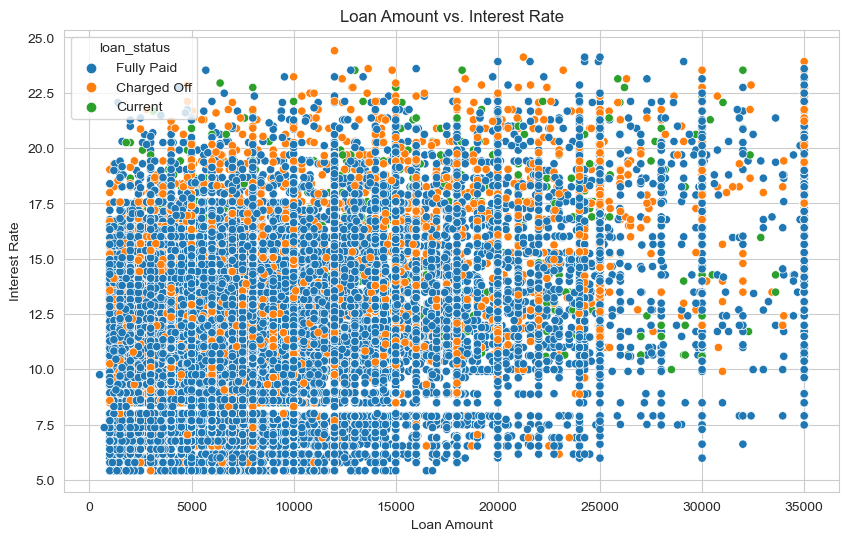

In [139]:
# Test Case 12: Scatter Plot of Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data_cleaned, x='loan_amnt', y='int_rate', hue='loan_status')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

### Observations 

### Scatter Plot of Loan Amount vs. Interest Rate
1. General Trend:

   - There is no clear correlation between loan amount and interest rate. The scatter plot shows a wide spread of interest rates across different loan amounts, indicating that loan size does not significantly impact the interest rate offered.
2. Loan Status:

   - Both "Fully Paid" and "Charged Off" loans are distributed across various loan amounts and interest rates.
   - Loans that are "Charged Off" tend to have higher interest rates more frequently than "Fully Paid" loans, suggesting that higher interest rates might be associated with a higher risk of default.
3. Loan Amounts:

   - The majority of loans are concentrated in the lower loan amounts, particularly below $20,000.
   
   - Higher loan amounts (> $20,000) are fewer and also spread across a range of interest rates.

This scatter plot illustrates that while higher interest rates might correlate with higher default risk, loan amounts do not have a strong influence on interest rates. This information is useful for understanding the risk profile and pricing strategies for loans.

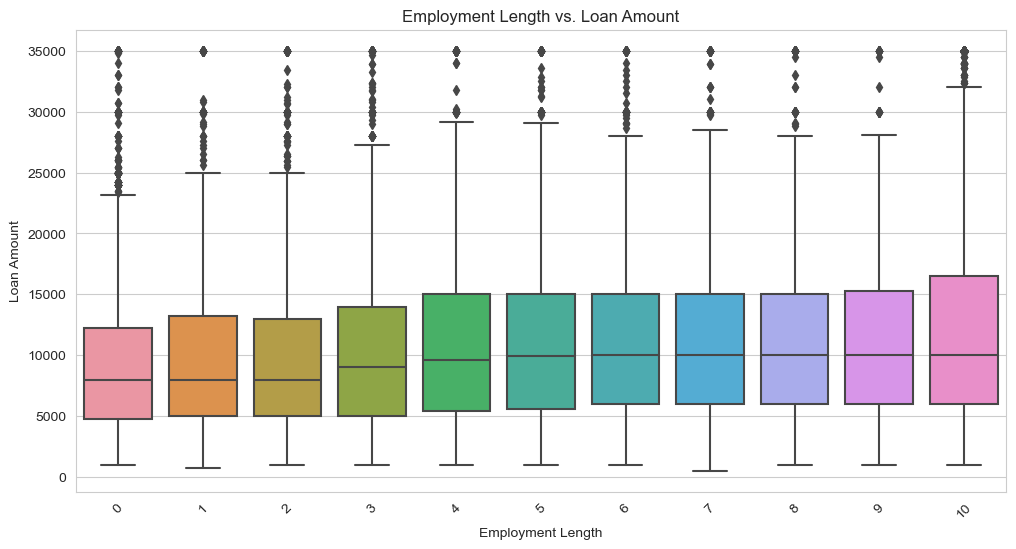

In [149]:
# Test Case 13: Box Plot of Employment length vs. Loan Amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data_cleaned, x='emp_length', y='loan_amnt')
plt.title('Employment Length vs. Loan Amount')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

### Observations 

### Box Plot of Employment Length vs. Loan Amount
1. Median Loan Amount:

   - The median loan amount is relatively consistent across different employment lengths, generally around $10,000 to $15,000.
2. Loan Amount Range:

   - The interquartile range (IQR), which represents the middle 50% of loan amounts, remains fairly consistent across employment lengths. This suggests that employment length does not significantly affect the spread of loan amounts.
3. Outliers:

   - There are numerous outliers in the higher loan amounts across all employment lengths. These outliers indicate that some borrowers take out significantly larger loans regardless of their employment duration.
4. Longest Employment Length (10+ years):

   - Borrowers with 10+ years of employment tend to have slightly higher loan amounts, as indicated by the higher median and the upper end of the IQR.
5. Shorter Employment Lengths (0-4 years):

- Borrowers with shorter employment lengths (0-4 years) have slightly lower median loan amounts compared to those with longer employment histories.
6. Employment Length Impact:

- Overall, the impact of employment length on loan amount appears to be minimal, with no dramatic differences in loan amounts across different employment lengths.

### Recommendations:
1. Loan Assessment:

   - Lenders may consider focusing on other factors in addition to employment length when assessing loan amounts, as employment length alone does not seem to significantly influence loan sizes.
2. Monitoring Outliers:

   - Pay attention to outliers, especially those with very high loan amounts. Further scrutiny may be required to ensure these loans are adequately supported by the borrower's financial situation.
3. Employment Verification:

   - Continue to verify employment length as part of the loan application process, but use it in conjunction with other indicators like credit score, income, and DTI ratio for a comprehensive risk assessment.

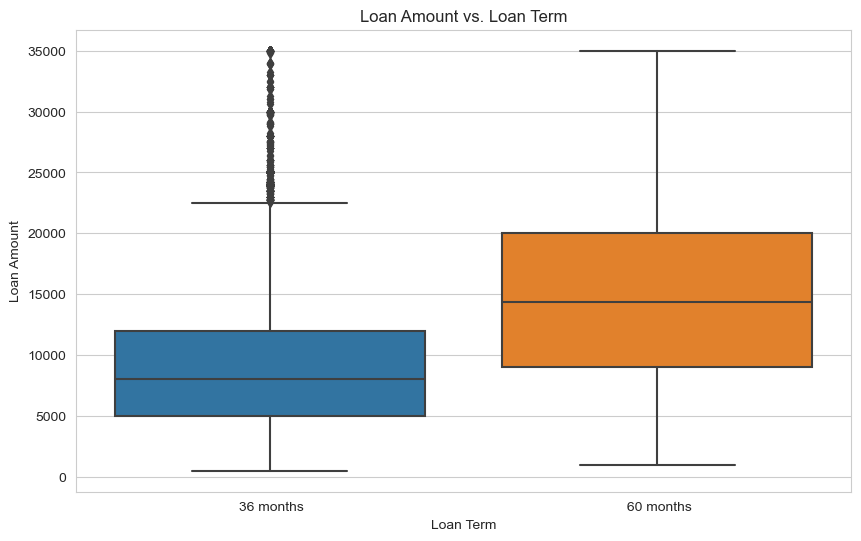

In [141]:
# Test Case 14: Box Plot of Loan term vs. Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='term', y='loan_amnt')
plt.title('Loan Amount vs. Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.show()

### Observations 

### Box Plot of Loan Amount vs. Loan Term
1. Loan Amounts for 36 Months Term:

   - The median loan amount for loans with a 36-month term is lower compared to loans with a 60-month term.
   - The interquartile range (IQR) for the 36-month term is narrower, indicating less variability in loan amounts.
   - There are fewer outliers, suggesting that loan amounts for 36-month loans are more consistent.
2. Loan Amounts for 60 Months Term:

- The median loan amount for loans with a 60-month term is higher than for the 36-month term.
- The IQR for the 60-month term is wider, indicating greater variability in loan amounts.
- There are more outliers, suggesting that loan amounts for 60-month loans vary more significantly.

This box plot indicates that longer-term loans (60 months) tend to have higher and more variable loan amounts compared to shorter-term loans (36 months). This could be due to borrowers opting for longer terms when they need to borrow larger amounts.

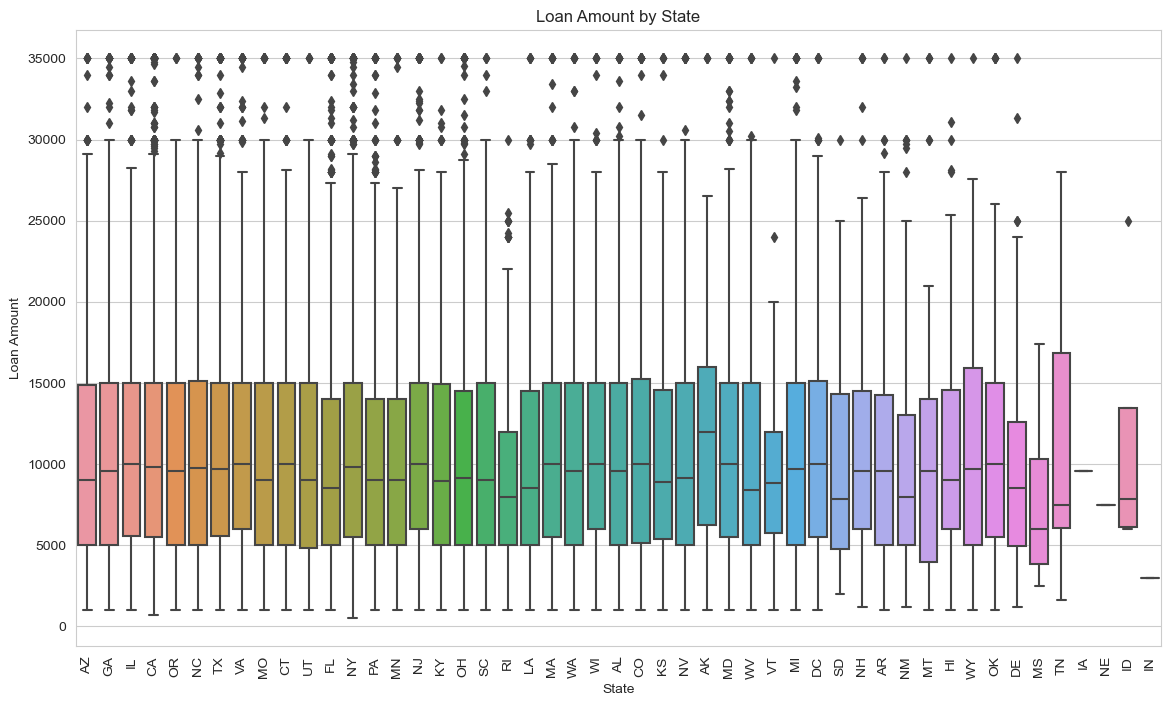

In [142]:
# Test Case 15: Box Plot of State vs. Loan Amount
plt.figure(figsize=(14, 8))
sns.boxplot(data=loan_data_cleaned, x='addr_state', y='loan_amnt')
plt.title('Loan Amount by State')
plt.xlabel('State')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.show()

### Observations 

### Box Plot of Loan Amount by State
1. Variation Across States:

   - There is noticeable variation in loan amounts across different states.
   - Some states, such as CA (California) and NY (New York), have higher median loan amounts compared to others.
2. Higher Loan Amounts:

   - States like CA, NY, and TX (Texas) show higher median loan amounts and wider interquartile ranges (IQR), indicating both higher borrowing and greater variability in loan amounts.
3. Lower Loan Amounts:

   - States such as SD (South Dakota), ME (Maine), and VT (Vermont) exhibit lower median loan amounts, suggesting lower borrowing in these regions.
4. Outliers:

   - Outliers are present in almost every state, indicating that there are individuals taking significantly higher or lower loan amounts compared to the majority in those states.

This box plot highlights the geographic differences in loan amounts, suggesting that borrowing patterns vary significantly across different states. These insights can be useful for regional analysis and understanding local lending behaviors.

In [143]:
defaulters = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off']

In [144]:
defaulters_stats = defaulters.describe()
print(defaulters_stats)

                 id     loan_amnt     int_rate  installment   emp_length  \
count  5.302000e+03   5302.000000  5302.000000  5302.000000  5302.000000   
mean   7.094811e+05  11837.910223    13.801347   327.283161     5.289702   
min    6.141900e+04   1000.000000     5.420000    22.790000     0.000000   
25%    5.422780e+05   5500.000000    11.360000   167.390000     2.000000   
50%    7.065370e+05  10000.000000    13.610000   286.515000     5.000000   
75%    8.604752e+05  16000.000000    16.387500   440.867500    10.000000   
max    1.077430e+06  35000.000000    24.400000  1305.190000    10.000000   
std    2.057915e+05   7913.850466     3.647204   209.855433     3.652853   

          annual_inc                        issue_d          dti  delinq_2yrs  \
count    5302.000000                           5302  5302.000000  5302.000000   
mean    56620.992099  2010-12-15 03:28:02.534892544    14.148333     0.165786   
min      4080.000000            2007-08-01 00:00:00     0.000000     0.0

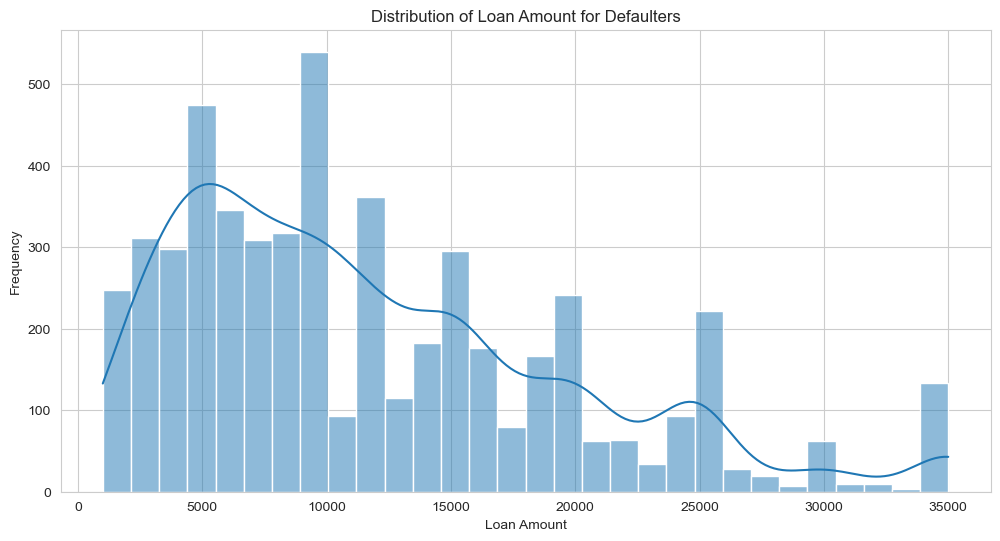

In [145]:
plt.figure(figsize=(12, 6))
sns.histplot(data=defaulters, x='loan_amnt', bins=30, kde=True)
plt.title('Distribution of Loan Amount for Defaulters')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

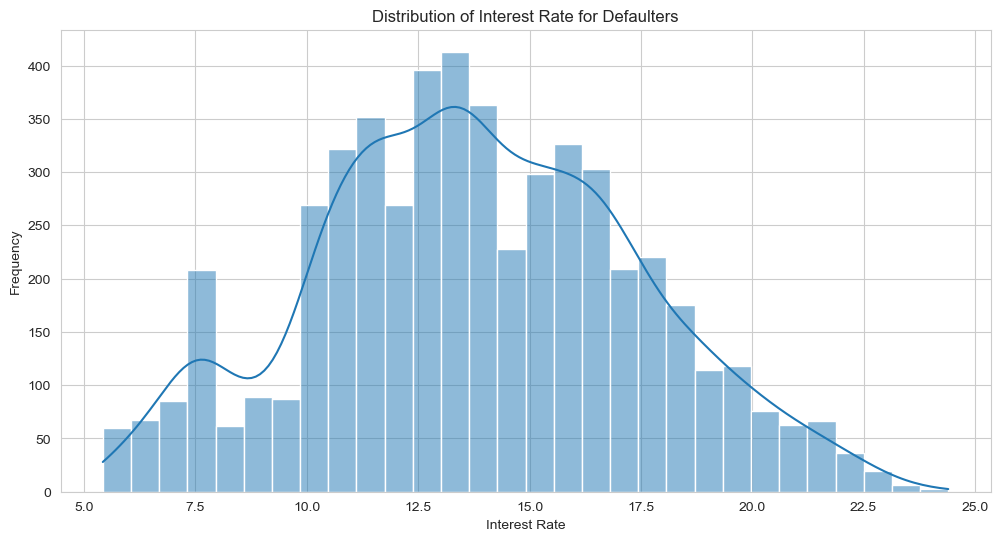

In [146]:
plt.figure(figsize=(12, 6))
sns.histplot(data=defaulters, x='int_rate', bins=30, kde=True)
plt.title('Distribution of Interest Rate for Defaulters')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

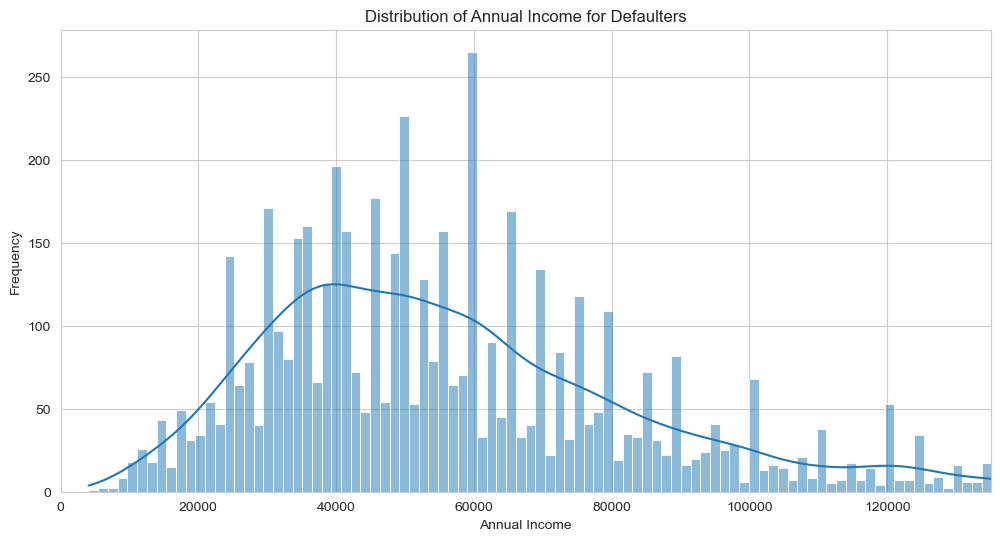

In [150]:
plt.figure(figsize=(12, 6))
sns.histplot(data=defaulters, x='annual_inc', bins=100, kde=True)
plt.title('Distribution of Annual Income for Defaulters')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.xlim(0, defaulters['annual_inc'].quantile(0.99))
plt.show()

# Analysis Results in Business Terms: Identifying Likely Defaulters 

### Univariate Analysis

1. Loan Purpose:

   - Small Business loans have the highest default rate (~25.98%).
   - Renewable Energy and Educational loans also show significant default rates (~18.45% and ~17.23%, respectively).
   - Action: 
     - Monitor loans issued for high-risk purposes closely and consider more stringent approval criteria.
2. Home Ownership:

   - Borrowers categorized under "Other" ownership have the highest default rate (~18.37%), 
     followed by Renters (15.02%).
   - Action: 
     - Apply higher scrutiny to renters and those with other non-standard home ownership statuses.
3. Debt-to-Income (DTI) Ratio:

   - Higher DTI ratios are associated with a higher likelihood of default.
   - Action: Set strict limits on DTI ratios for loan approvals, and provide financial counseling to high-DTI borrowers.
4. Loan to Income Ratio:

   - Borrowers with higher loan to income ratios are at a higher risk of default.
   - Action: 
     - Implement caps on loan amounts relative to income to manage risk better.

### Bivariate Analysis

1. Loan Amount vs. Annual Income:

   - Positive correlation indicates that higher income borrowers tend to take out larger loans.
   - Charged Off loans are more frequent in lower income brackets with higher loan amounts.
   - Action: 
     - For low-income borrowers, limit loan amounts to reduce risk.
2. Debt-to-Income Ratio vs. Interest Rate:

   - No strong linear trend, but higher interest rates are associated with higher DTI ratios.
   - Charged Off loans are more frequent at higher interest rates.
   - Action: 
     - Adjust interest rates based on DTI ratios and implement risk-based pricing.
3. Annual Income vs. Debt-to-Income Ratio:

   - Wide distribution with no strong linear correlation.
   - Higher DTI ratios are associated with a higher presence of Charged Off loans.
   - Action: 
     - Regularly monitor high-DTI borrowers regardless of income level.
4. Employment Length vs. Loan Amount:

   - Median loan amounts are consistent across employment lengths, with slight increases for those with 10+ years.
   - Numerous outliers indicate that some borrowers take out significantly larger loans regardless of employment length.
   - Action: 
     - Factor in employment stability when assessing loan applications, but consider it alongside other variables.

### Identifying Likely Defaulters

To identify likely defaulters, consider the following steps:

1. High-Risk Loan Purposes:

   - Prioritize monitoring and stricter approval processes for loans taken for Small Business, Renewable Energy, and Educational purposes.
2. High DTI Ratios:

   - Identify borrowers with high DTI ratios and implement measures such as higher interest rates, additional collateral requirements, or denial of loan applications.
- High Loan to Income Ratios:

  - Set thresholds for loan to income ratios and decline applications that exceed these thresholds.
4. Loan Amounts Relative to Income:

   - For low-income borrowers taking out high loan amounts, ensure rigorous credit checks and possibly higher interest rates or guarantees.
5. Employment Stability:

   - Give preference to borrowers with longer employment histories, but not at the expense of overlooking other high-risk indicators.
6. Segmentation and Targeting:

   - Segment borrowers into risk categories based on the combination of these factors and design targeted strategies to mitigate default risks.